In [53]:
!pip install -U vnstock


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
## Có thể gọi các class chi tiết trong thư viện thay vì sử dụng cấp cao nhất là Vnstock
from vnstock import Vnstock
from vnstock import Listing, Quote, Company, Finance, Trading, Screener,listing_companies

ImportError: cannot import name 'listing_companies' from 'vnstock' (c:\Users\Admin\anaconda3\Lib\site-packages\vnstock\__init__.py)

In [ ]:
# Tạo danh sách các mã cổ phiếu VN30 (cập nhật tháng 11/2025)
vn30_list = [
    # Ngân hàng (13 mã)
    'ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB',
    # Bảo hiểm (1 mã)
    'BVH',
    # Công nghệ - Thông tin (1 mã)
    'FPT',
    # Năng lượng (3 mã)
    'GAS', 'PLX', 'POW',
    # Tập đoàn đa ngành (6 mã)
    'GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM',
    # Bán lẻ - Công nghệ (1 mã)
    'MWG',
    # Hàng tiêu dùng - Thực phẩm (1 mã)
    'MSN',
    # Thép - Công nghiệp (1 mã)
    'HPG',
    # Bất động sản (2 mã)
    'BCM', 'VRE',
    # Chứng khoán (1 mã)
    'SSI'
]

print(f"✓ Đã tạo danh sách VN30 với {len(vn30_list)} mã cổ phiếu")
print(f"Danh sách: {sorted(vn30_list)}")

✓ Đã tạo danh sách VN30 với 30 mã cổ phiếu
Danh sách: ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'PLX', 'POW', 'SAB', 'SHB', 'SSB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']


In [ ]:
# Phân loại các mã VN30 theo ngành nghề
import pandas as pd

# Dictionary phân loại ngành (cập nhật 11/2025)
vn30_sectors_dict = {
    'Ngân hàng': ['ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB'],
    'Bảo hiểm': ['BVH'],
    'Công nghệ - Thông tin': ['FPT'],
    'Năng lượng': ['GAS', 'PLX', 'POW'],
    'Tập đoàn đa ngành': ['GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM'],
    'Bán lẻ - Công nghệ': ['MWG'],
    'Hàng tiêu dùng - Thực phẩm': ['MSN'],
    'Thép - Công nghiệp': ['HPG'],
    'Bất động sản': ['BCM', 'VRE'],
    'Chứng khoán': ['SSI']
}

# Tạo DataFrame từ dictionary
sector_data = []
for sector, symbols in vn30_sectors_dict.items():
    for symbol in symbols:
        sector_data.append({'symbol': symbol, 'sector': sector})

df_sectors = pd.DataFrame(sector_data)

# Kiểm tra tổng số mã
print("Phân loại ngành cho VN30:")
print(df_sectors.groupby('sector')['symbol'].apply(list))
print(f"\nTổng số mã: {len(df_sectors)}")
print(f"\nCác ngành:")
for sector, count in df_sectors['sector'].value_counts().items():
    print(f"  • {sector}: {count} mã")

df_sectors.head()

Phân loại ngành cho VN30:
sector
Bán lẻ - Công nghệ                                                        [MWG]
Bảo hiểm                                                                  [BVH]
Bất động sản                                                         [BCM, VRE]
Chứng khoán                                                               [SSI]
Công nghệ - Thông tin                                                     [FPT]
Hàng tiêu dùng - Thực phẩm                                                [MSN]
Ngân hàng                     [ACB, BID, CTG, HDB, MBB, SHB, SSB, STB, TCB, ...
Năng lượng                                                      [GAS, PLX, POW]
Thép - Công nghiệp                                                        [HPG]
Tập đoàn đa ngành                                [GVR, SAB, VIC, VJC, VNM, VHM]
Name: symbol, dtype: object

Tổng số mã: 30

Các ngành:
  • Ngân hàng: 13 mã
  • Tập đoàn đa ngành: 6 mã
  • Năng lượng: 3 mã
  • Bất động sản: 2 mã
  • Bảo hiểm: 1 mã

,symbol,sector
0,ACB,Ngân hàng
1,BID,Ngân hàng
2,CTG,Ngân hàng
3,HDB,Ngân hàng
4,MBB,Ngân hàng


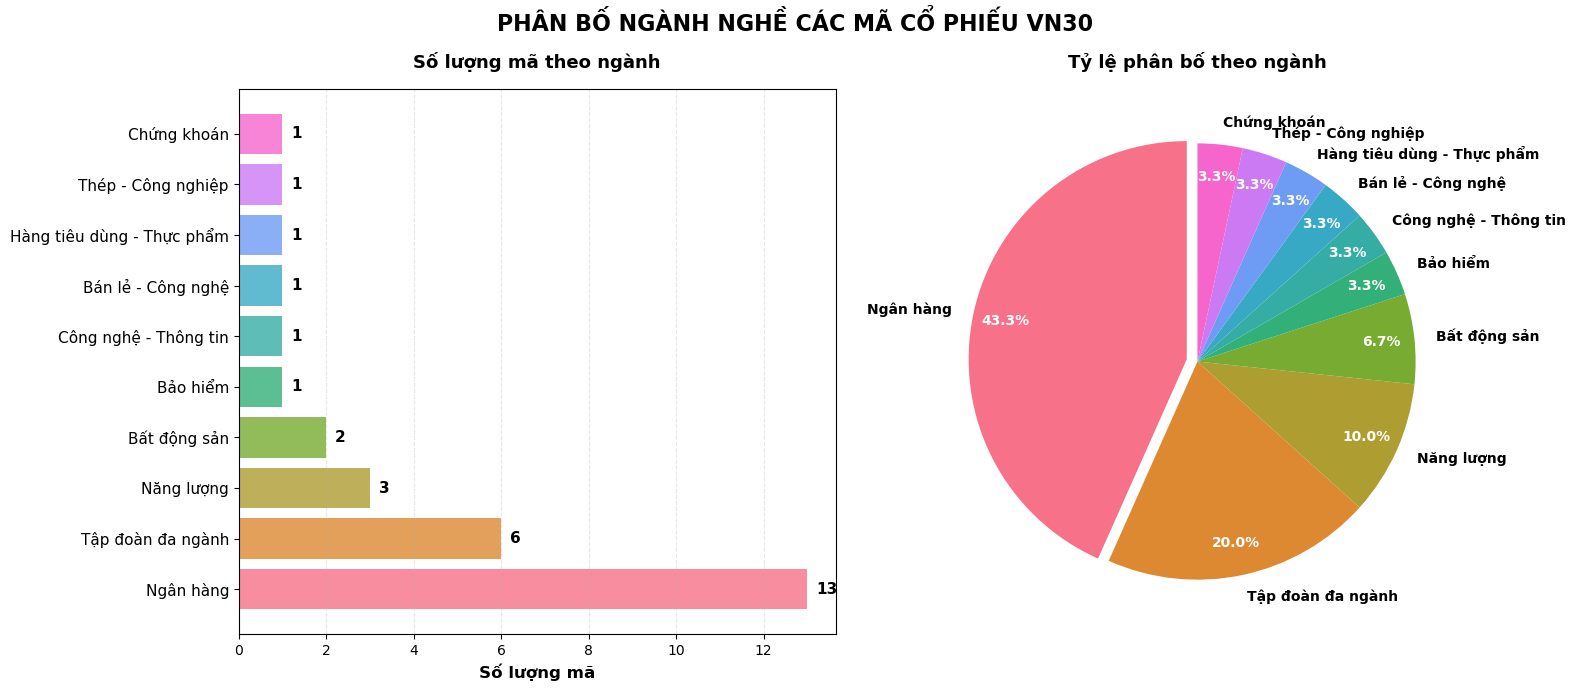


THỐNG KÊ PHÂN BỐ NGÀNH VN30

📊 Ngân hàng: 13 mã (43.3%)
   └─ ACB, BID, CTG, HDB, MBB, SHB, SSB, STB, TCB, TPB, VCB, VIB, VPB

📊 Tập đoàn đa ngành: 6 mã (20.0%)
   └─ GVR, SAB, VHM, VIC, VJC, VNM

📊 Năng lượng: 3 mã (10.0%)
   └─ GAS, PLX, POW

📊 Bất động sản: 2 mã (6.7%)
   └─ BCM, VRE

📊 Bảo hiểm: 1 mã (3.3%)
   └─ BVH

📊 Công nghệ - Thông tin: 1 mã (3.3%)
   └─ FPT

📊 Bán lẻ - Công nghệ: 1 mã (3.3%)
   └─ MWG

📊 Hàng tiêu dùng - Thực phẩm: 1 mã (3.3%)
   └─ MSN

📊 Thép - Công nghiệp: 1 mã (3.3%)
   └─ HPG

📊 Chứng khoán: 1 mã (3.3%)
   └─ SSI

TỔNG CỘNG: 30 mã cổ phiếu VN30


In [ ]:
# Vẽ biểu đồ phân bố ngành cho VN30
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập font hỗ trợ tiếng Việt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Đếm số lượng mã theo ngành
sector_counts = df_sectors['sector'].value_counts()

# Tạo figure với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('PHÂN BỐ NGÀNH NGHỀ CÁC MÃ CỔ PHIẾU VN30', 
             fontsize=16, fontweight='bold', y=0.98)

# Màu sắc
colors = sns.color_palette("husl", len(sector_counts))

# 1. Biểu đồ cột (Bar Chart)
bars = ax1.barh(range(len(sector_counts)), sector_counts.values, color=colors, alpha=0.8)
ax1.set_yticks(range(len(sector_counts)))
ax1.set_yticklabels(sector_counts.index, fontsize=11)
ax1.set_xlabel('Số lượng mã', fontsize=12, fontweight='bold')
ax1.set_title('Số lượng mã theo ngành', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Thêm số liệu vào cột
for i, (bar, v) in enumerate(zip(bars, sector_counts.values)):
    ax1.text(v + 0.2, i, str(v), va='center', fontweight='bold', fontsize=11)

# 2. Biểu đồ tròn (Pie Chart)
wedges, texts, autotexts = ax2.pie(sector_counts.values, 
                                     labels=sector_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     pctdistance=0.85,
                                     explode=[0.05 if i == 0 else 0 for i in range(len(sector_counts))])
ax2.set_title('Tỷ lệ phân bố theo ngành', fontsize=13, fontweight='bold', pad=15)

# Làm đẹp text
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# In thống kê ra console
print("\n" + "="*80)
print("THỐNG KÊ PHÂN BỐ NGÀNH VN30")
print("="*80)
for sector, count in sector_counts.items():
    symbols = sorted(df_sectors[df_sectors['sector'] == sector]['symbol'].values)
    percentage = count/len(df_sectors)*100
    print(f"\n📊 {sector}: {count} mã ({percentage:.1f}%)")
    print(f"   └─ {', '.join(symbols)}")
print("\n" + "="*80)
print(f"TỔNG CỘNG: {len(df_sectors)} mã cổ phiếu VN30")
print("="*80)

In [ ]:
start = "2015-01-01"
end = "2024-12-31"

In [ ]:
# Lấy dữ liệu OHLCV của VN30
import pandas as pd
from vnstock import Vnstock

print("="*80)
print("LẤY DỮ LIỆU OHLCV CHO VN30")
print("="*80)
print(f"📅 Khoảng thời gian: {start} đến {end}")
print(f"📊 Số mã cổ phiếu: {len(vn30_list)}")
print(f"📈 Dữ liệu: Open, High, Low, Close, Volume")
print("-"*80)

# Lấy dữ liệu cho từng mã
all_data = []
success_count = 0
failed_symbols = []

for i, symbol in enumerate(vn30_list, 1):
    try:
        print(f"[{i:2d}/{len(vn30_list)}] Đang lấy {symbol}...", end=' ')
        
        stock = Vnstock().stock(symbol=symbol, source='VCI')
        df = stock.quote.history(start=start, end=end)
        
        if df is not None and not df.empty:
            # Reset index để chuyển time/date thành cột
            df = df.reset_index()
            
            # Chuẩn hóa tên cột nếu cần
            if 'time' in df.columns:
                df = df.rename(columns={'time': 'date'})
            
            # Chọn các cột OHLCV + date
            ohlcv_cols = ['date', 'open', 'high', 'low', 'close', 'volume']
            df = df[[col for col in ohlcv_cols if col in df.columns]]
            
            # Thêm cột symbol
            df['symbol'] = symbol
            
            all_data.append(df)
            success_count += 1
            print(f"✓ ({len(df):,} ngày)")
        else:
            failed_symbols.append(symbol)
            print(f"✗ Không có dữ liệu")
            
    except Exception as e:
        failed_symbols.append(symbol)
        print(f"✗ Lỗi: {str(e)[:50]}")

# Gộp tất cả dữ liệu
if all_data:
    vn30_ohlcv = pd.concat(all_data, ignore_index=True)
    
    # Chuyển đổi date sang datetime
    vn30_ohlcv['date'] = pd.to_datetime(vn30_ohlcv['date'])
    
    # Sắp xếp theo symbol và date
    vn30_ohlcv = vn30_ohlcv.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print("\n" + "="*80)
    print("KẾT QUẢ")
    print("="*80)
    print(f"✅ Số mã lấy thành công: {success_count}/{len(vn30_list)}")
    print(f"✅ Tổng số dòng dữ liệu: {len(vn30_ohlcv):,}")
    
    if failed_symbols:
        print(f"⚠️  Các mã thất bại ({len(failed_symbols)}): {', '.join(failed_symbols)}")
    
    # Thống kê chi tiết
    print(f"\n📋 Các cột dữ liệu:")
    for col in vn30_ohlcv.columns:
        print(f"   • {col}")
    
    print(f"\n📊 Thống kê:")
    print(f"   • Số mã: {vn30_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {vn30_ohlcv['date'].min().date()} đến {vn30_ohlcv['date'].max().date()}")
    print(f"   • Trung bình ngày/mã: {len(vn30_ohlcv) / vn30_ohlcv['symbol'].nunique():.0f}")
    
    # Thống kê theo từng mã
    print(f"\n📈 Số ngày giao dịch theo từng mã:")
    symbol_counts = vn30_ohlcv['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts.items():
        print(f"   {symbol}: {count:,} ngày")
    
    # Hiển thị mẫu dữ liệu
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng đầu):")
    display(vn30_ohlcv.head(10))
    
    print(f"\n💾 Dữ liệu đã lưu vào biến: vn30_ohlcv")
    print(f"   Shape: {vn30_ohlcv.shape} (rows, columns)")
    
else:
    print("\n❌ Không lấy được dữ liệu nào!")
    vn30_ohlcv = pd.DataFrame()

LẤY DỮ LIỆU OHLCV CHO VN30
📅 Khoảng thời gian: 2015-01-01 đến 2024-12-31
📊 Số mã cổ phiếu: 30
📈 Dữ liệu: Open, High, Low, Close, Volume
--------------------------------------------------------------------------------
[ 1/30] Đang lấy ACB... ✓ (2,494 ngày)
[ 2/30] Đang lấy BID... ✓ (2,499 ngày)
[ 3/30] Đang lấy CTG... ✓ (2,499 ngày)
[ 4/30] Đang lấy HDB... ✓ (1,747 ngày)
[ 5/30] Đang lấy MBB... ✓ (2,499 ngày)
[ 6/30] Đang lấy SHB... ✓ (2,496 ngày)
[ 7/30] Đang lấy SSB... ✓ (946 ngày)
[ 8/30] Đang lấy STB... ✓ (2,499 ngày)
[ 9/30] Đang lấy TCB... ✓ (1,649 ngày)
[10/30] Đang lấy TPB... ✓ (1,678 ngày)
[11/30] Đang lấy VCB... ✓ (2,499 ngày)
[12/30] Đang lấy VIB... ✓ (1,989 ngày)
[13/30] Đang lấy VPB... ✓ (1,846 ngày)
[14/30] Đang lấy BVH... ✓ (2,499 ngày)
[15/30] Đang lấy FPT... ✓ (2,499 ngày)
[16/30] Đang lấy GAS... ✓ (2,499 ngày)
[17/30] Đang lấy PLX... ✓ (1,928 ngày)
[18/30] Đang lấy POW... ✓ (1,701 ngày)
[19/30] Đang lấy GVR... ✓ (1,693 ngày)
[20/30] Đang lấy SAB... ✓ (2,019 ngày)
[21/3

,date,open,high,low,close,volume,symbol
0,2015-01-05,2.35,2.35,2.32,2.34,55888,ACB
1,2015-01-06,2.32,2.37,2.31,2.37,89802,ACB
2,2015-01-07,2.37,2.45,2.37,2.40,232861,ACB
3,2015-01-08,2.40,2.42,2.38,2.42,14880,ACB
4,2015-01-09,2.42,2.49,2.38,2.43,693623,ACB
5,2015-01-12,2.45,2.51,2.43,2.46,368334,ACB
6,2015-01-13,2.46,2.55,2.46,2.52,416006,ACB
7,2015-01-14,2.52,2.52,2.46,2.48,300420,ACB
8,2015-01-15,2.46,2.48,2.43,2.43,244964,ACB
9,2015-01-16,2.45,2.46,2.40,2.43,374204,ACB



💾 Dữ liệu đã lưu vào biến: vn30_ohlcv
   Shape: (64929, 7) (rows, columns)


In [ ]:
# Tính Returns và chọn mã TOP 1 từ mỗi ngành
import pandas as pd
import numpy as np

print("="*80)
print("TÍNH RETURNS VÀ CHỌN MÃ TOP 1 TỪNG NGÀNH")
print("="*80)

if 'vn30_ohlcv' not in globals() or vn30_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu OHLCV. Vui lòng chạy cell lấy dữ liệu trước!")
else:
    # Tạo bản sao dữ liệu
    df = vn30_ohlcv.copy()
    
    # Đảm bảo sắp xếp đúng
    df = df.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print(f"📊 Dữ liệu: {len(df):,} dòng, {df['symbol'].nunique()} mã")
    
    # ========== TÍNH DAILY RETURNS ==========
    print("\n" + "-"*80)
    print("BƯỚC 1: TÍNH DAILY RETURNS")
    print("-"*80)
    print("Công thức: return = (close_t - close_{t-1}) / close_{t-1}")
    
    # Tính returns cho từng mã
    df['daily_return'] = df.groupby('symbol')['close'].pct_change()
    
    # Xử lý inf và NaN
    inf_count = np.isinf(df['daily_return']).sum()
    if inf_count > 0:
        print(f"⚠️  Tìm thấy {inf_count} giá trị inf, thay thế bằng NaN")
        df['daily_return'] = df['daily_return'].replace([np.inf, -np.inf], np.nan)
    
    # Loại bỏ NaN (ngày đầu tiên của mỗi mã)
    df_with_returns = df.dropna(subset=['daily_return'])
    
    print(f"✓ Đã tính returns cho {df_with_returns['symbol'].nunique()} mã")
    print(f"✓ Tổng số quan sát: {len(df_with_returns):,} ngày giao dịch")
    
    # Thống kê tổng quan
    print(f"\n📊 Thống kê Returns tổng thể:")
    print(f"   • Mean:   {df_with_returns['daily_return'].mean():>10.4%}")
    print(f"   • Std:    {df_with_returns['daily_return'].std():>10.4%}")
    print(f"   • Min:    {df_with_returns['daily_return'].min():>10.4%}")
    print(f"   • Max:    {df_with_returns['daily_return'].max():>10.4%}")
    print(f"   • Median: {df_with_returns['daily_return'].median():>10.4%}")
    
    # ========== TÍNH CHỈ SỐ THEO TỪNG MÃ ==========
    print("\n" + "-"*80)
    print("BƯỚC 2: TÍNH CHỈ SỐ HIỆU SUẤT THEO TỪNG MÃ")
    print("-"*80)
    
    # Tính các chỉ số cho từng mã
    symbol_metrics = df_with_returns.groupby('symbol').agg({
        'daily_return': ['mean', 'std', 'count'],
        'volume': 'mean',
        'close': 'mean'
    }).reset_index()
    
    # Flatten column names
    symbol_metrics.columns = ['symbol', 'mean_return', 'std_return', 'trading_days', 
                               'avg_volume', 'avg_price']
    
    # Tính Sharpe Ratio (annualized, giả sử risk-free = 0)
    symbol_metrics['sharpe_ratio'] = (symbol_metrics['mean_return'] * 252) / (symbol_metrics['std_return'] * np.sqrt(252))
    
    # Tính Cumulative Return
    cumulative_returns = df_with_returns.groupby('symbol').apply(
        lambda x: (1 + x['daily_return']).prod() - 1
    ).reset_index()
    cumulative_returns.columns = ['symbol', 'cumulative_return']
    
    # Merge
    symbol_metrics = symbol_metrics.merge(cumulative_returns, on='symbol')
    
    # Merge với thông tin ngành
    symbol_metrics = symbol_metrics.merge(df_sectors[['symbol', 'sector']], on='symbol', how='left')
    
    print(f"✓ Đã tính các chỉ số cho {len(symbol_metrics)} mã")
    
    # ========== CHỌN TOP 1 THEO CÁC TIÊU CHÍ ==========
    print("\n" + "="*80)
    print("TOP 1 MÃ THEO TỪNG NGÀNH")
    print("="*80)
    
    # 1. TOP 1 theo Mean Return
    print("\n🏆 1. CHỌN THEO MEAN RETURN CAO NHẤT")
    print("-"*80)
    print(f"{'Ngành':30s} {'Mã':6s} {'Mean Return':>12s} {'Cum Return':>12s} {'Sharpe':>10s} {'Days':>8s}")
    print("-"*80)
    
    top_by_return = symbol_metrics.loc[symbol_metrics.groupby('sector')['mean_return'].idxmax()]
    top_by_return = top_by_return.sort_values('mean_return', ascending=False)
    
    vn30_top_return = []
    for _, row in top_by_return.iterrows():
        print(f"{row['sector']:30s} {row['symbol']:6s} "
              f"{row['mean_return']:>11.2%} {row['cumulative_return']:>11.2%} "
              f"{row['sharpe_ratio']:>10.2f} {int(row['trading_days']):>8,}")
        vn30_top_return.append(row['symbol'])
    
    # 2. TOP 1 theo Sharpe Ratio
    print("\n🏆 2. CHỌN THEO SHARPE RATIO CAO NHẤT (RỦI RO ĐIỀU CHỈNH)")
    print("-"*80)
    print(f"{'Ngành':30s} {'Mã':6s} {'Sharpe':>10s} {'Mean Return':>12s} {'Std Return':>12s}")
    print("-"*80)
    
    top_by_sharpe = symbol_metrics.loc[symbol_metrics.groupby('sector')['sharpe_ratio'].idxmax()]
    top_by_sharpe = top_by_sharpe.sort_values('sharpe_ratio', ascending=False)
    
    vn30_top_sharpe = []
    for _, row in top_by_sharpe.iterrows():
        print(f"{row['sector']:30s} {row['symbol']:6s} "
              f"{row['sharpe_ratio']:>10.2f} {row['mean_return']:>11.2%} "
              f"{row['std_return']:>11.2%}")
        vn30_top_sharpe.append(row['symbol'])
    
    # 3. TOP 1 theo Cumulative Return
    print("\n🏆 3. CHỌN THEO CUMULATIVE RETURN CAO NHẤT (TỔNG LỢI NHUẬN)")
    print("-"*80)
    print(f"{'Ngành':30s} {'Mã':6s} {'Cum Return':>12s} {'Mean Return':>12s} {'Days':>8s}")
    print("-"*80)
    
    top_by_cumulative = symbol_metrics.loc[symbol_metrics.groupby('sector')['cumulative_return'].idxmax()]
    top_by_cumulative = top_by_cumulative.sort_values('cumulative_return', ascending=False)
    
    vn30_top_cumulative = []
    for _, row in top_by_cumulative.iterrows():
        print(f"{row['sector']:30s} {row['symbol']:6s} "
              f"{row['cumulative_return']:>11.2%} {row['mean_return']:>11.2%} "
              f"{int(row['trading_days']):>8,}")
        vn30_top_cumulative.append(row['symbol'])
    
    # 4. TOP 1 theo Volume (Thanh khoản)
    print("\n🏆 4. CHỌN THEO THANH KHOẢN CAO NHẤT (AVERAGE VOLUME)")
    print("-"*80)
    print(f"{'Ngành':30s} {'Mã':6s} {'Avg Volume':>15s} {'Mean Return':>12s} {'Avg Price':>12s}")
    print("-"*80)
    
    top_by_volume = symbol_metrics.loc[symbol_metrics.groupby('sector')['avg_volume'].idxmax()]
    top_by_volume = top_by_volume.sort_values('avg_volume', ascending=False)
    
    vn30_top_volume = []
    for _, row in top_by_volume.iterrows():
        print(f"{row['sector']:30s} {row['symbol']:6s} "
              f"{row['avg_volume']:>15,.0f} {row['mean_return']:>11.2%} "
              f"{row['avg_price']:>12,.0f}")
        vn30_top_volume.append(row['symbol'])
    
    # ========== SO SÁNH VÀ KHUYẾN NGHỊ ==========
    print("\n" + "="*80)
    print("SO SÁNH CÁC DANH SÁCH")
    print("="*80)
    
    print(f"\n📋 TOP 1 theo Mean Return:     {len(vn30_top_return)} mã")
    print(f"   {sorted(vn30_top_return)}")
    
    print(f"\n📋 TOP 1 theo Sharpe Ratio:    {len(vn30_top_sharpe)} mã")
    print(f"   {sorted(vn30_top_sharpe)}")
    
    print(f"\n📋 TOP 1 theo Cumulative:      {len(vn30_top_cumulative)} mã")
    print(f"   {sorted(vn30_top_cumulative)}")
    
    print(f"\n📋 TOP 1 theo Volume:          {len(vn30_top_volume)} mã")
    print(f"   {sorted(vn30_top_volume)}")
    
    # Tìm mã xuất hiện nhiều nhất
    all_tops = vn30_top_return + vn30_top_sharpe + vn30_top_cumulative + vn30_top_volume
    from collections import Counter
    top_frequency = Counter(all_tops)
    
    print(f"\n⭐ MÃ XUẤT HIỆN NHIỀU NHẤT:")
    for symbol, count in top_frequency.most_common(10):
        sector = symbol_metrics[symbol_metrics['symbol'] == symbol]['sector'].values[0]
        print(f"   {symbol:6s} - {sector:30s} ({count}/4 danh sách)")
    
    # ========== KHUYẾN NGHỊ ==========
    print("\n" + "="*80)
    print("KHUYẾN NGHỊ")
    print("="*80)
    
    # Chọn theo Sharpe Ratio (cân bằng return/risk)
    print(f"\n💡 DANH SÁCH KHUYẾN NGHỊ (Theo Sharpe Ratio):")
    print(f"   {sorted(vn30_top_sharpe)}")
    
    print(f"\n📊 Lý do: Sharpe Ratio cân bằng tốt giữa lợi nhuận và rủi ro")
    print(f"   → Phù hợp cho danh mục đầu tư dài hạn")
    
    # Lưu kết quả
    vn30_recommended = vn30_top_sharpe
    
    # Lưu dữ liệu returns
    vn30_returns = df_with_returns.copy()
    
    print("\n💾 Dữ liệu đã lưu:")
    print(f"   • vn30_returns: DataFrame với daily returns ({len(vn30_returns):,} dòng)")
    print(f"   • symbol_metrics: Chỉ số hiệu suất theo mã ({len(symbol_metrics)} mã)")
    print(f"   • vn30_recommended: Danh sách TOP 1 khuyến nghị ({len(vn30_recommended)} mã)")
    print(f"   • vn30_top_return, vn30_top_sharpe, vn30_top_cumulative, vn30_top_volume")
    
    print("\n✅ HOÀN TẤT TÍNH RETURNS VÀ LỰA CHỌN MÃ TOP 1!")

TÍNH RETURNS VÀ CHỌN MÃ TOP 1 TỪNG NGÀNH
📊 Dữ liệu: 64,929 dòng, 30 mã

--------------------------------------------------------------------------------
BƯỚC 1: TÍNH DAILY RETURNS
--------------------------------------------------------------------------------
Công thức: return = (close_t - close_{t-1}) / close_{t-1}
⚠️  Tìm thấy 2 giá trị inf, thay thế bằng NaN
✓ Đã tính returns cho 30 mã
✓ Tổng số quan sát: 64,897 ngày giao dịch

📊 Thống kê Returns tổng thể:
   • Mean:      0.0683%
   • Std:       2.4245%
   • Min:    -100.0000%
   • Max:     268.4030%
   • Median:    0.0000%

--------------------------------------------------------------------------------
BƯỚC 2: TÍNH CHỈ SỐ HIỆU SUẤT THEO TỪNG MÃ
--------------------------------------------------------------------------------
✓ Đã tính các chỉ số cho 30 mã

TOP 1 MÃ THEO TỪNG NGÀNH

🏆 1. CHỌN THEO MEAN RETURN CAO NHẤT
--------------------------------------------------------------------------------
Ngành                          Mã 

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [ ]:
# Lọc dữ liệu OHLCV cho 10 mã cổ phiếu đã chọn từ vn30_ohlcv
import pandas as pd

# Danh sách 10 mã cổ phiếu
selected_symbols = ['ACB', 'BCM', 'BVH', 'FPT', 'GAS', 'GVR', 'HPG', 'MSN', 'MWG', 'SSI']

print("="*80)
print("LỌC DỮ LIỆU OHLCV CHO 10 MÃ CỔ PHIẾU TỪ VN30_OHLCV")
print("="*80)
print(f"📋 Danh sách: {selected_symbols}")
print(f"📊 Số mã cổ phiếu: {len(selected_symbols)}")
print("-"*80)

if 'vn30_ohlcv' not in globals() or vn30_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu vn30_ohlcv. Vui lòng chạy cell lấy dữ liệu VN30 trước!")
    selected_ohlcv = pd.DataFrame()
else:
    # Lọc dữ liệu cho 10 mã đã chọn
    selected_ohlcv = vn30_ohlcv[vn30_ohlcv['symbol'].isin(selected_symbols)].copy()
    
    # Sắp xếp theo symbol và date
    selected_ohlcv = selected_ohlcv.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print("\n" + "="*80)
    print("KẾT QUẢ")
    print("="*80)
    print(f"✅ Tổng số dòng dữ liệu: {len(selected_ohlcv):,}")
    print(f"✅ Số mã trong DataFrame: {selected_ohlcv['symbol'].nunique()}")
    
    # Kiểm tra mã nào có/không có
    found_symbols = selected_ohlcv['symbol'].unique().tolist()
    missing_symbols = [s for s in selected_symbols if s not in found_symbols]
    
    if missing_symbols:
        print(f"⚠️  Các mã không có dữ liệu ({len(missing_symbols)}): {', '.join(missing_symbols)}")
    
    # Thống kê chi tiết
    print(f"\n📋 Các cột dữ liệu:")
    for col in selected_ohlcv.columns:
        print(f"   • {col}")
    
    print(f"\n📊 Thống kê:")
    print(f"   • Số mã: {selected_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {selected_ohlcv['date'].min().date()} đến {selected_ohlcv['date'].max().date()}")
    print(f"   • Trung bình ngày/mã: {len(selected_ohlcv) / selected_ohlcv['symbol'].nunique():.0f}")
    
    # Thống kê theo từng mã
    print(f"\n📈 Số ngày giao dịch theo từng mã:")
    symbol_counts_selected = selected_ohlcv['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts_selected.items():
        print(f"   {symbol}: {count:,} ngày")
    
    # Hiển thị mẫu dữ liệu
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng đầu):")
    display(selected_ohlcv.head(10))
    
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng cuối):")
    display(selected_ohlcv.tail(10))
    
    print(f"\n💾 Dữ liệu đã lưu vào biến: selected_ohlcv")
    print(f"   Shape: {selected_ohlcv.shape} (rows, columns)")
    print(f"   Memory usage: {selected_ohlcv.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n✅ HOÀN TẤT!")

LỌC DỮ LIỆU OHLCV CHO 10 MÃ CỔ PHIẾU TỪ VN30_OHLCV
📋 Danh sách: ['ACB', 'BCM', 'BVH', 'FPT', 'GAS', 'GVR', 'HPG', 'MSN', 'MWG', 'SSI']
📊 Số mã cổ phiếu: 10
--------------------------------------------------------------------------------

KẾT QUẢ
✅ Tổng số dòng dữ liệu: 23,392
✅ Số mã trong DataFrame: 10

📋 Các cột dữ liệu:
   • date
   • open
   • high
   • low
   • close
   • volume
   • symbol

📊 Thống kê:
   • Số mã: 10
   • Khoảng thời gian: 2015-01-05 đến 2024-12-31
   • Trung bình ngày/mã: 2339

📈 Số ngày giao dịch theo từng mã:
   ACB: 2,494 ngày
   BCM: 1,712 ngày
   BVH: 2,499 ngày
   FPT: 2,499 ngày
   GAS: 2,499 ngày
   GVR: 1,693 ngày
   HPG: 2,499 ngày
   MSN: 2,499 ngày
   MWG: 2,499 ngày
   SSI: 2,499 ngày

📄 Mẫu dữ liệu OHLCV (10 dòng đầu):


,date,open,high,low,close,volume,symbol
0,2015-01-05,2.35,2.35,2.32,2.34,55888,ACB
1,2015-01-06,2.32,2.37,2.31,2.37,89802,ACB
2,2015-01-07,2.37,2.45,2.37,2.40,232861,ACB
3,2015-01-08,2.40,2.42,2.38,2.42,14880,ACB
4,2015-01-09,2.42,2.49,2.38,2.43,693623,ACB
5,2015-01-12,2.45,2.51,2.43,2.46,368334,ACB
6,2015-01-13,2.46,2.55,2.46,2.52,416006,ACB
7,2015-01-14,2.52,2.52,2.46,2.48,300420,ACB
8,2015-01-15,2.46,2.48,2.43,2.43,244964,ACB
9,2015-01-16,2.45,2.46,2.40,2.43,374204,ACB



📄 Mẫu dữ liệu OHLCV (10 dòng cuối):


,date,open,high,low,close,volume,symbol
23382,2024-12-18,25.36,25.55,25.16,25.55,7208100,SSI
23383,2024-12-19,25.16,25.55,24.82,25.55,30722013,SSI
23384,2024-12-20,25.45,25.60,25.26,25.60,12292019,SSI
23385,2024-12-23,25.55,25.65,25.21,25.21,7847711,SSI
23386,2024-12-24,25.21,25.31,24.87,25.31,12305704,SSI
23387,2024-12-25,25.36,26.09,25.26,25.89,26237763,SSI
23388,2024-12-26,25.84,25.94,25.70,25.70,8770905,SSI
23389,2024-12-27,25.75,26.04,25.65,25.94,16356516,SSI
23390,2024-12-30,25.94,26.23,25.79,25.79,11501673,SSI
23391,2024-12-31,25.79,25.79,25.40,25.40,8238165,SSI



💾 Dữ liệu đã lưu vào biến: selected_ohlcv
   Shape: (23392, 7) (rows, columns)
   Memory usage: 2.23 MB

✅ HOÀN TẤT!


In [ ]:
# Tính returns hàng ngày (tỷ lệ thay đổi giá) của selected_ohlcv
import pandas as pd
import numpy as np

print("="*80)
print("TÍNH DAILY RETURNS CHO 10 MÃ CỔ PHIẾU")
print("="*80)

if 'selected_ohlcv' not in globals() or selected_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu selected_ohlcv. Vui lòng chạy cell lọc dữ liệu trước!")
else:
    # Tạo bản sao dữ liệu
    df = selected_ohlcv.copy()
    
    # Đảm bảo sắp xếp đúng theo symbol và date
    df = df.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print(f"📊 Dữ liệu đầu vào: {len(df):,} dòng, {df['symbol'].nunique()} mã")
    
    # ========== TÍNH DAILY RETURNS ==========
    print("\n" + "-"*80)
    print("TÍNH DAILY RETURNS")
    print("-"*80)
    print("Công thức: daily_return = (close_t - close_{t-1}) / close_{t-1}")
    print("           = pct_change() của giá close")
    
    # Tính returns cho từng mã (phần trăm thay đổi giá close)
    df['daily_return'] = df.groupby('symbol')['close'].pct_change()
    
    # Xử lý các giá trị inf (nếu có)
    inf_count = np.isinf(df['daily_return']).sum()
    if inf_count > 0:
        print(f"⚠️  Phát hiện {inf_count} giá trị inf → Thay thế bằng NaN")
        df['daily_return'] = df['daily_return'].replace([np.inf, -np.inf], np.nan)
    
    # Đếm NaN (ngày đầu tiên của mỗi mã sẽ có NaN)
    nan_count = df['daily_return'].isna().sum()
    print(f"✓ Số giá trị NaN (ngày đầu tiên mỗi mã): {nan_count}")
    
    # Tạo DataFrame với returns (loại bỏ NaN)
    selected_returns = df.dropna(subset=['daily_return']).copy()
    
    print(f"✓ Đã tính returns cho {selected_returns['symbol'].nunique()} mã")
    print(f"✓ Tổng số quan sát có returns: {len(selected_returns):,} ngày giao dịch")
    
    # ========== THỐNG KÊ RETURNS TỔNG THỂ ==========
    print("\n" + "="*80)
    print("THỐNG KÊ RETURNS TỔNG THỂ (10 MÃ)")
    print("="*80)
    
    print(f"\n📊 Các chỉ số thống kê:")
    print(f"   • Mean (Trung bình):        {selected_returns['daily_return'].mean():>10.4%}")
    print(f"   • Std (Độ lệch chuẩn):      {selected_returns['daily_return'].std():>10.4%}")
    print(f"   • Min (Nhỏ nhất):           {selected_returns['daily_return'].min():>10.4%}")
    print(f"   • Max (Lớn nhất):           {selected_returns['daily_return'].max():>10.4%}")
    print(f"   • Median (Trung vị):        {selected_returns['daily_return'].median():>10.4%}")
    print(f"   • 25th Percentile:          {selected_returns['daily_return'].quantile(0.25):>10.4%}")
    print(f"   • 75th Percentile:          {selected_returns['daily_return'].quantile(0.75):>10.4%}")
    
    # ========== THỐNG KÊ RETURNS THEO TỪNG MÃ ==========
    print("\n" + "="*80)
    print("THỐNG KÊ RETURNS THEO TỪNG MÃ")
    print("="*80)
    
    # Tính các chỉ số cho từng mã
    returns_stats = selected_returns.groupby('symbol')['daily_return'].agg([
        ('mean_return', 'mean'),
        ('std_return', 'std'),
        ('min_return', 'min'),
        ('max_return', 'max'),
        ('median_return', 'median'),
        ('count', 'count')
    ]).reset_index()
    
    # Tính Sharpe Ratio (annualized, giả sử risk-free rate = 0)
    returns_stats['sharpe_ratio'] = (returns_stats['mean_return'] * 252) / (returns_stats['std_return'] * np.sqrt(252))
    
    # Tính Cumulative Return
    cumulative = selected_returns.groupby('symbol')['daily_return'].apply(
        lambda x: (1 + x).prod() - 1
    ).reset_index()
    cumulative.columns = ['symbol', 'cumulative_return']
    
    returns_stats = returns_stats.merge(cumulative, on='symbol')
    
    # Sắp xếp theo Mean Return
    returns_stats = returns_stats.sort_values('mean_return', ascending=False)
    
    print(f"\n{'Symbol':8s} {'Mean Return':>12s} {'Std Return':>12s} {'Sharpe':>10s} {'Cumulative':>12s} {'Days':>8s}")
    print("-"*80)
    
    for _, row in returns_stats.iterrows():
        print(f"{row['symbol']:8s} "
              f"{row['mean_return']:>11.4%} "
              f"{row['std_return']:>11.4%} "
              f"{row['sharpe_ratio']:>10.2f} "
              f"{row['cumulative_return']:>11.2%} "
              f"{int(row['count']):>8,}")
    
    # ========== MERGE VỚI THÔNG TIN NGÀNH ==========
    if 'df_sectors' in globals():
        returns_stats = returns_stats.merge(
            df_sectors[['symbol', 'sector']], 
            on='symbol', 
            how='left'
        )
        
        print("\n" + "="*80)
        print("RETURNS THEO NGÀNH")
        print("="*80)
        
        sector_returns = returns_stats.groupby('sector').agg({
            'mean_return': 'mean',
            'std_return': 'mean',
            'sharpe_ratio': 'mean',
            'cumulative_return': 'mean',
            'symbol': 'count'
        }).reset_index()
        sector_returns.columns = ['sector', 'avg_mean_return', 'avg_std', 'avg_sharpe', 'avg_cumulative', 'count']
        sector_returns = sector_returns.sort_values('avg_mean_return', ascending=False)
        
        print(f"\n{'Ngành':30s} {'Avg Return':>12s} {'Avg Std':>12s} {'Avg Sharpe':>10s} {'Số mã':>8s}")
        print("-"*80)
        
        for _, row in sector_returns.iterrows():
            print(f"{row['sector']:30s} "
                  f"{row['avg_mean_return']:>11.4%} "
                  f"{row['avg_std']:>11.4%} "
                  f"{row['avg_sharpe']:>10.2f} "
                  f"{int(row['count']):>8}")
    
    # ========== HIỂN THỊ MẪU DỮ LIỆU ==========
    print("\n" + "="*80)
    print("MẪU DỮ LIỆU VỚI RETURNS")
    print("="*80)
    
    print(f"\n📄 10 dòng đầu tiên:")
    display(selected_returns[['date', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'daily_return']].head(10))
    
    print(f"\n📄 10 dòng cuối cùng:")
    display(selected_returns[['date', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'daily_return']].tail(10))
    
    # ========== LƯU DỮ LIỆU ==========
    print("\n" + "="*80)
    print("DỮ LIỆU ĐÃ LƯU")
    print("="*80)
    
    print(f"\n💾 Các biến đã tạo:")
    print(f"   • selected_returns: DataFrame với daily returns ({len(selected_returns):,} dòng)")
    print(f"     └─ Columns: {list(selected_returns.columns)}")
    print(f"   • returns_stats: Thống kê returns theo từng mã ({len(returns_stats)} mã)")
    print(f"     └─ Columns: {list(returns_stats.columns)}")
    
    print(f"\n📊 Shape:")
    print(f"   • selected_returns: {selected_returns.shape}")
    print(f"   • returns_stats: {returns_stats.shape}")
    
    print(f"\n💽 Memory usage:")
    print(f"   • selected_returns: {selected_returns.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n✅ HOÀN TẤT TÍNH RETURNS!")


TÍNH DAILY RETURNS CHO 10 MÃ CỔ PHIẾU
📊 Dữ liệu đầu vào: 23,392 dòng, 10 mã

--------------------------------------------------------------------------------
TÍNH DAILY RETURNS
--------------------------------------------------------------------------------
Công thức: daily_return = (close_t - close_{t-1}) / close_{t-1}
           = pct_change() của giá close
✓ Số giá trị NaN (ngày đầu tiên mỗi mã): 10
✓ Đã tính returns cho 10 mã
✓ Tổng số quan sát có returns: 23,382 ngày giao dịch

THỐNG KÊ RETURNS TỔNG THỂ (10 MÃ)

📊 Các chỉ số thống kê:
   • Mean (Trung bình):           0.0852%
   • Std (Độ lệch chuẩn):         2.1944%
   • Min (Nhỏ nhất):            -13.8374%
   • Max (Lớn nhất):             16.7949%
   • Median (Trung vị):           0.0000%
   • 25th Percentile:            -0.9365%
   • 75th Percentile:             1.0661%

THỐNG KÊ RETURNS THEO TỪNG MÃ

Symbol    Mean Return   Std Return     Sharpe   Cumulative     Days
------------------------------------------------------------

,date,symbol,open,high,low,close,volume,daily_return
1,2015-01-06,ACB,2.32,2.37,2.31,2.37,89802,0.012821
2,2015-01-07,ACB,2.37,2.45,2.37,2.40,232861,0.012658
3,2015-01-08,ACB,2.40,2.42,2.38,2.42,14880,0.008333
4,2015-01-09,ACB,2.42,2.49,2.38,2.43,693623,0.004132
5,2015-01-12,ACB,2.45,2.51,2.43,2.46,368334,0.012346
6,2015-01-13,ACB,2.46,2.55,2.46,2.52,416006,0.024390
7,2015-01-14,ACB,2.52,2.52,2.46,2.48,300420,-0.015873
8,2015-01-15,ACB,2.46,2.48,2.43,2.43,244964,-0.020161
9,2015-01-16,ACB,2.45,2.46,2.40,2.43,374204,0.000000
10,2015-01-19,ACB,2.46,2.48,2.45,2.46,230317,0.012346



📄 10 dòng cuối cùng:


,date,symbol,open,high,low,close,volume,daily_return
23382,2024-12-18,SSI,25.36,25.55,25.16,25.55,7208100,0.007492
23383,2024-12-19,SSI,25.16,25.55,24.82,25.55,30722013,0.000000
23384,2024-12-20,SSI,25.45,25.60,25.26,25.60,12292019,0.001957
23385,2024-12-23,SSI,25.55,25.65,25.21,25.21,7847711,-0.015234
23386,2024-12-24,SSI,25.21,25.31,24.87,25.31,12305704,0.003967
23387,2024-12-25,SSI,25.36,26.09,25.26,25.89,26237763,0.022916
23388,2024-12-26,SSI,25.84,25.94,25.70,25.70,8770905,-0.007339
23389,2024-12-27,SSI,25.75,26.04,25.65,25.94,16356516,0.009339
23390,2024-12-30,SSI,25.94,26.23,25.79,25.79,11501673,-0.005783
23391,2024-12-31,SSI,25.79,25.79,25.40,25.40,8238165,-0.015122



DỮ LIỆU ĐÃ LƯU

💾 Các biến đã tạo:
   • selected_returns: DataFrame với daily returns (23,382 dòng)
     └─ Columns: ['date', 'open', 'high', 'low', 'close', 'volume', 'symbol', 'daily_return']
   • returns_stats: Thống kê returns theo từng mã (10 mã)
     └─ Columns: ['symbol', 'mean_return', 'std_return', 'min_return', 'max_return', 'median_return', 'count', 'sharpe_ratio', 'cumulative_return', 'sector']

📊 Shape:
   • selected_returns: (23382, 8)
   • returns_stats: (10, 10)

💽 Memory usage:
   • selected_returns: 2.59 MB

✅ HOÀN TẤT TÍNH RETURNS!


TÍNH ĐỘ TƯƠNG QUAN VÀ VẼ HEATMAP

--------------------------------------------------------------------------------
BƯỚC 1: CHUẨN BỊ DỮ LIỆU
--------------------------------------------------------------------------------
✓ Đã tạo pivot table: (2498, 10)
✓ Các mã cổ phiếu: ['ACB', 'BCM', 'BVH', 'FPT', 'GAS', 'GVR', 'HPG', 'MSN', 'MWG', 'SSI']
✓ Khoảng thời gian: 2015-01-06 đến 2024-12-31

📊 Tỷ lệ missing values theo từng mã:
   ACB: 0.20%
   BCM: 31.51%
   BVH: 0.00%
   FPT: 0.00%
   GAS: 0.00%
   GVR: 32.27%
   HPG: 0.00%
   MSN: 0.00%
   MWG: 0.00%
   SSI: 0.00%

--------------------------------------------------------------------------------
BƯỚC 2: TÍNH MA TRẬN TƯƠNG QUAN (PEARSON)
--------------------------------------------------------------------------------
✓ Đã tính correlation matrix: (10, 10)

📊 Thống kê correlation:
   • Mean correlation:      0.3683
   • Std correlation:       0.0869
   • Min correlation:       0.2023
   • Max correlation:       0.5479
   • Median correlati

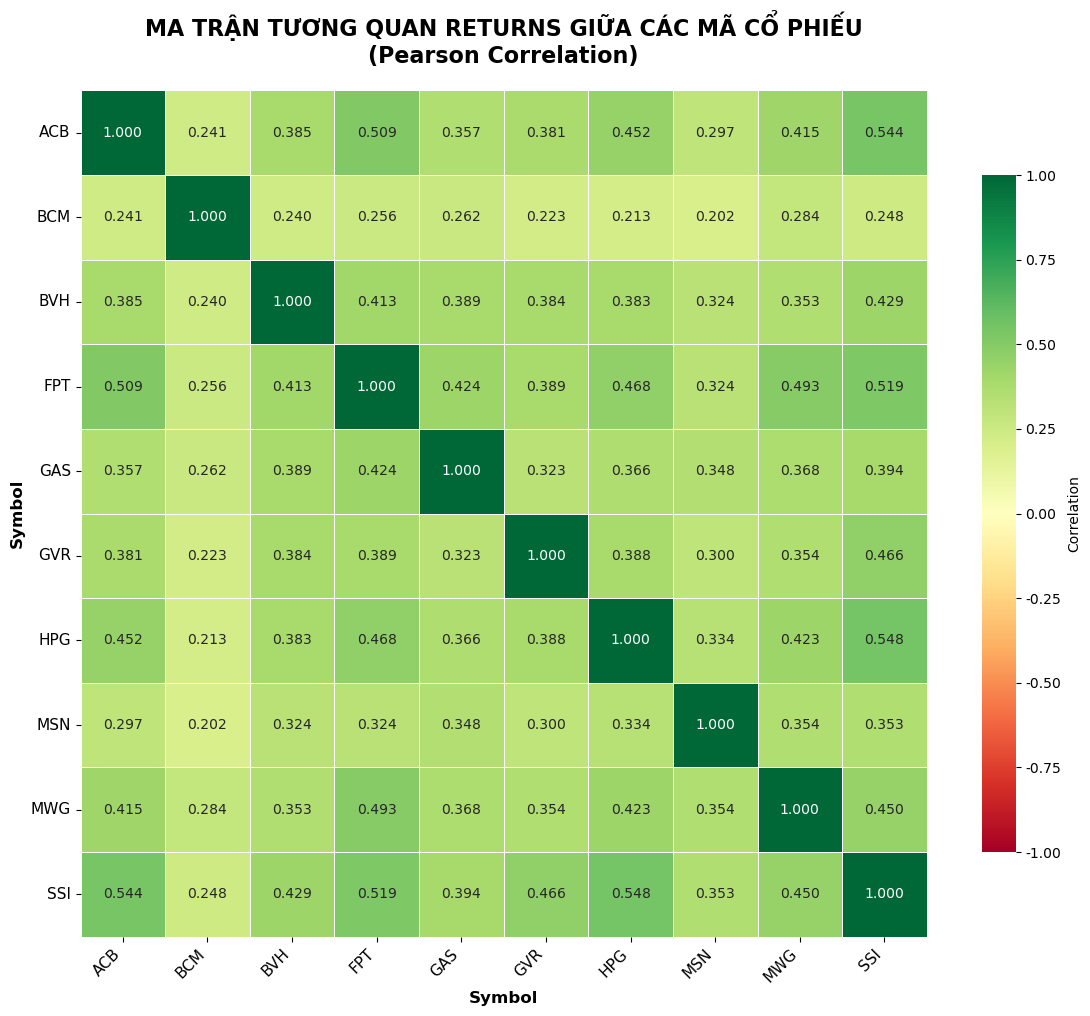


CORRELATION THEO NGÀNH

📊 So sánh correlation:
   • Within-sector (cùng ngành):
     - Count: 0
     - Mean:  nan
     - Std:   nan

   • Cross-sector (khác ngành):
     - Count: 45
     - Mean:  0.3683
     - Std:   0.0879

DỮ LIỆU ĐÃ LƯU

💾 Các biến đã tạo:
   • returns_pivot: Returns pivot table ((2498, 10))
   • corr_matrix: Ma trận tương quan ((10, 10))
   • corr_pairs_df: DataFrame các cặp correlation (45 cặp)

📊 Ma trận tương quan (5 dòng đầu):


symbol,ACB,BCM,BVH,FPT,GAS,GVR,HPG,MSN,MWG,SSI
symbol,,,,,,,,,,
ACB,1.000000,0.240755,0.384583,0.508826,0.356858,0.380753,0.451563,0.297230,0.415236,0.543561
BCM,0.240755,1.000000,0.240057,0.256208,0.262498,0.223269,0.212575,0.202310,0.284214,0.248466
BVH,0.384583,0.240057,1.000000,0.412692,0.389286,0.384400,0.382866,0.323730,0.353281,0.429302
FPT,0.508826,0.256208,0.412692,1.000000,0.423595,0.389062,0.468469,0.324169,0.493331,0.518606
GAS,0.356858,0.262498,0.389286,0.423595,1.000000,0.323112,0.365620,0.348145,0.368463,0.394160



✅ HOÀN TẤT TÍNH CORRELATION VÀ VẼ HEATMAP!


In [ ]:
# Tính độ tương quan và vẽ heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("TÍNH ĐỘ TƯƠNG QUAN VÀ VẼ HEATMAP")
print("="*80)

if 'selected_returns' not in globals() or selected_returns.empty:
    print("⚠️  Chưa có dữ liệu selected_returns. Vui lòng chạy cell tính returns trước!")
else:
    # ========== CHUẨN BỊ DỮ LIỆU ==========
    print("\n" + "-"*80)
    print("BƯỚC 1: CHUẨN BỊ DỮ LIỆU")
    print("-"*80)
    
    # Pivot data: mỗi cột là một mã cổ phiếu, mỗi hàng là một ngày
    returns_pivot = selected_returns.pivot(
        index='date', 
        columns='symbol', 
        values='daily_return'
    )
    
    print(f"✓ Đã tạo pivot table: {returns_pivot.shape}")
    print(f"✓ Các mã cổ phiếu: {list(returns_pivot.columns)}")
    print(f"✓ Khoảng thời gian: {returns_pivot.index.min().date()} đến {returns_pivot.index.max().date()}")
    
    # Kiểm tra missing values
    missing_pct = returns_pivot.isna().sum() / len(returns_pivot) * 100
    print(f"\n📊 Tỷ lệ missing values theo từng mã:")
    for symbol, pct in missing_pct.items():
        print(f"   {symbol}: {pct:.2f}%")
    
    # ========== TÍNH MA TRẬN TƯƠNG QUAN ==========
    print("\n" + "-"*80)
    print("BƯỚC 2: TÍNH MA TRẬN TƯƠNG QUAN (PEARSON)")
    print("-"*80)
    
    # Tính correlation matrix (Pearson)
    corr_matrix = returns_pivot.corr()
    
    print(f"✓ Đã tính correlation matrix: {corr_matrix.shape}")
    print(f"\n📊 Thống kê correlation:")
    
    # Lấy upper triangle (không tính đường chéo)
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    corr_values = upper_triangle.stack().values
    
    print(f"   • Mean correlation:    {corr_values.mean():>8.4f}")
    print(f"   • Std correlation:     {corr_values.std():>8.4f}")
    print(f"   • Min correlation:     {corr_values.min():>8.4f}")
    print(f"   • Max correlation:     {corr_values.max():>8.4f}")
    print(f"   • Median correlation:  {np.median(corr_values):>8.4f}")
    
    # Tìm cặp có correlation cao nhất và thấp nhất
    print("\n🔝 Top 5 cặp có correlation CAO NHẤT:")
    print(f"{'Mã 1':8s} {'Mã 2':8s} {'Correlation':>15s}")
    print("-"*35)
    
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'symbol1': corr_matrix.columns[i],
                'symbol2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })
    
    corr_pairs_df = pd.DataFrame(corr_pairs)
    top_corr = corr_pairs_df.nlargest(5, 'correlation')
    
    for _, row in top_corr.iterrows():
        print(f"{row['symbol1']:8s} {row['symbol2']:8s} {row['correlation']:>15.4f}")
    
    print("\n🔽 Top 5 cặp có correlation THẤP NHẤT:")
    print(f"{'Mã 1':8s} {'Mã 2':8s} {'Correlation':>15s}")
    print("-"*35)
    
    bottom_corr = corr_pairs_df.nsmallest(5, 'correlation')
    
    for _, row in bottom_corr.iterrows():
        print(f"{row['symbol1']:8s} {row['symbol2']:8s} {row['correlation']:>15.4f}")
    
    # ========== VẼ HEATMAP ==========
    print("\n" + "="*80)
    print("VẼ HEATMAP")
    print("="*80)
    
    # Thiết lập font
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['axes.unicode_minus'] = False
    
    # Tạo figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Vẽ heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,           # Hiển thị giá trị
        fmt='.3f',            # Format 3 chữ số thập phân
        cmap='RdYlGn',        # Color map: Red-Yellow-Green
        center=0,             # Center ở 0
        square=True,          # Ô vuông
        linewidths=0.5,       # Đường kẻ giữa các ô
        cbar_kws={"shrink": 0.8, "label": "Correlation"},
        vmin=-1,              # Min value
        vmax=1,               # Max value
        ax=ax
    )
    
    ax.set_title('MA TRẬN TƯƠNG QUAN RETURNS GIỮA CÁC MÃ CỔ PHIẾU\n(Pearson Correlation)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Symbol', fontsize=12, fontweight='bold')
    ax.set_ylabel('Symbol', fontsize=12, fontweight='bold')
    
    # Xoay labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # ========== THỐNG KÊ CORRELATION THEO NGÀNH ==========
    if 'df_sectors' in globals():
        print("\n" + "="*80)
        print("CORRELATION THEO NGÀNH")
        print("="*80)
        
        # Thêm thông tin ngành vào corr_pairs
        corr_pairs_df = corr_pairs_df.merge(
            df_sectors[['symbol', 'sector']], 
            left_on='symbol1', 
            right_on='symbol', 
            how='left'
        ).rename(columns={'sector': 'sector1'}).drop('symbol', axis=1)
        
        corr_pairs_df = corr_pairs_df.merge(
            df_sectors[['symbol', 'sector']], 
            left_on='symbol2', 
            right_on='symbol', 
            how='left'
        ).rename(columns={'sector': 'sector2'}).drop('symbol', axis=1)
        
        # So sánh within-sector vs cross-sector
        corr_pairs_df['same_sector'] = corr_pairs_df['sector1'] == corr_pairs_df['sector2']
        
        within_sector = corr_pairs_df[corr_pairs_df['same_sector']]['correlation']
        cross_sector = corr_pairs_df[~corr_pairs_df['same_sector']]['correlation']
        
        print(f"\n📊 So sánh correlation:")
        print(f"   • Within-sector (cùng ngành):")
        print(f"     - Count: {len(within_sector)}")
        print(f"     - Mean:  {within_sector.mean():.4f}")
        print(f"     - Std:   {within_sector.std():.4f}")
        
        print(f"\n   • Cross-sector (khác ngành):")
        print(f"     - Count: {len(cross_sector)}")
        print(f"     - Mean:  {cross_sector.mean():.4f}")
        print(f"     - Std:   {cross_sector.std():.4f}")
    
    # ========== LƯU DỮ LIỆU ==========
    print("\n" + "="*80)
    print("DỮ LIỆU ĐÃ LƯU")
    print("="*80)
    
    print(f"\n💾 Các biến đã tạo:")
    print(f"   • returns_pivot: Returns pivot table ({returns_pivot.shape})")
    print(f"   • corr_matrix: Ma trận tương quan ({corr_matrix.shape})")
    print(f"   • corr_pairs_df: DataFrame các cặp correlation ({len(corr_pairs_df)} cặp)")
    
    print(f"\n📊 Ma trận tương quan (5 dòng đầu):")
    display(corr_matrix.head())
    
    print("\n✅ HOÀN TẤT TÍNH CORRELATION VÀ VẼ HEATMAP!")


VẼ BIỂU ĐỒ GIÁ ĐÓNG CỬA CỦA 10 MÃ CỔ PHIẾU

📊 Thông tin dữ liệu:
   • Số mã cổ phiếu: 10
   • Khoảng thời gian: 2015-01-05 đến 2024-12-31
   • Tổng số dòng: 23,392
   ✓ Đã vẽ ACB: 2494 điểm dữ liệu
   ✓ Đã vẽ BCM: 1712 điểm dữ liệu
   ✓ Đã vẽ BVH: 2499 điểm dữ liệu
   ✓ Đã vẽ FPT: 2499 điểm dữ liệu
   ✓ Đã vẽ GAS: 2499 điểm dữ liệu
   ✓ Đã vẽ GVR: 1693 điểm dữ liệu
   ✓ Đã vẽ HPG: 2499 điểm dữ liệu
   ✓ Đã vẽ MSN: 2499 điểm dữ liệu
   ✓ Đã vẽ MWG: 2499 điểm dữ liệu
   ✓ Đã vẽ SSI: 2499 điểm dữ liệu


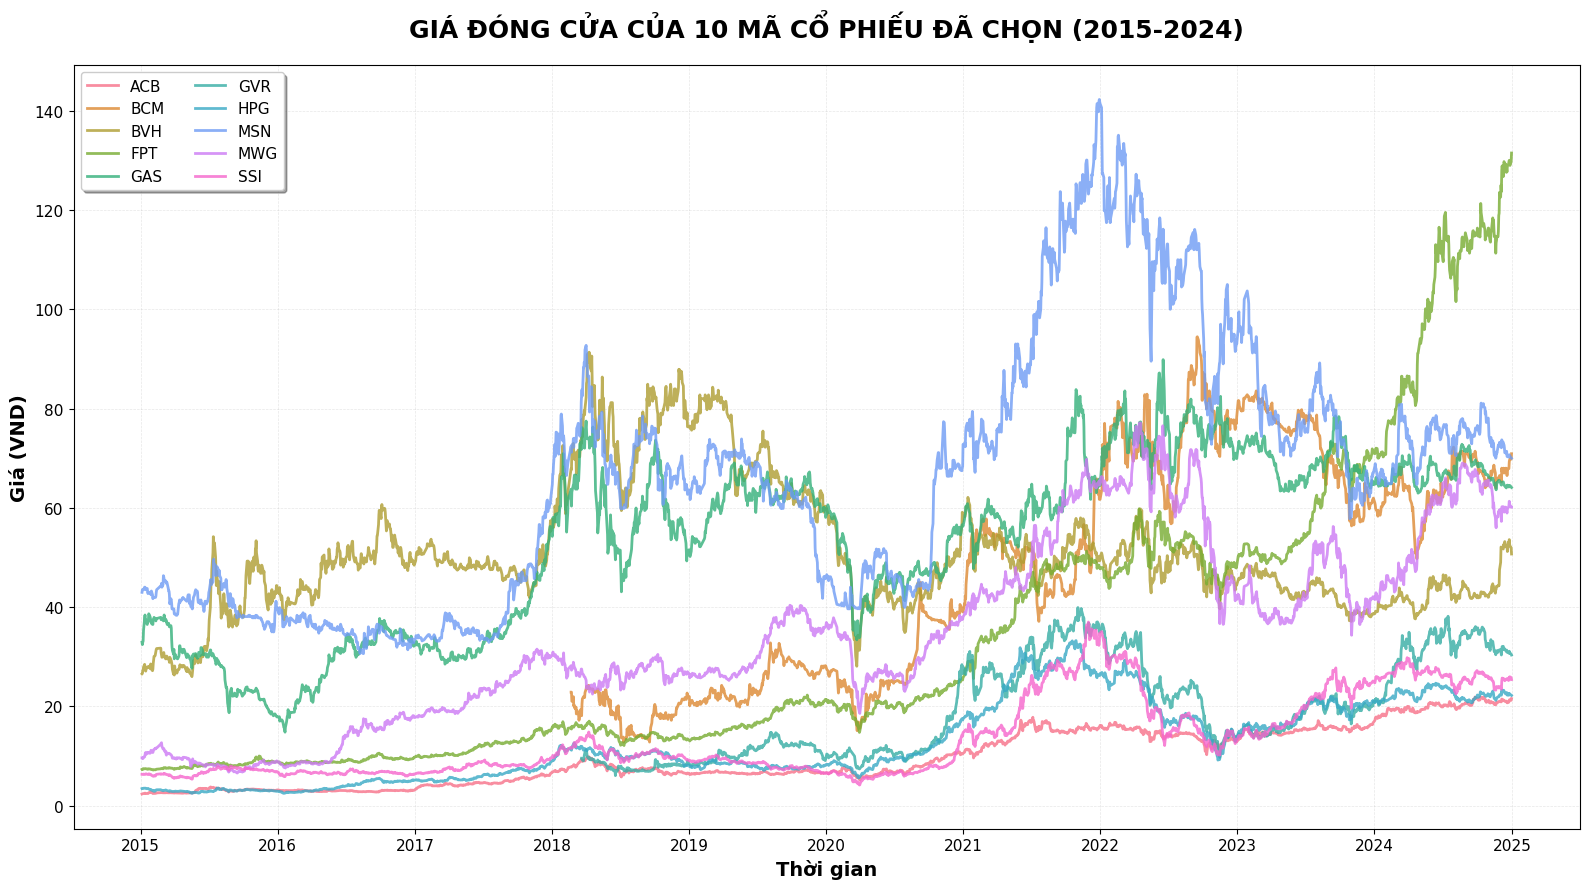


THỐNG KÊ GIÁ ĐÓNG CỬA

Symbol      Min Price    Max Price    Avg Price      Current        Range   Change %
------------------------------------------------------------------------------------------
MSN                31          142           66           70          112     128.5%
GAS                15           90           54           64           75     333.1%
BVH                26           91           51           51           65      95.1%
BCM                13           94           48           71           82     453.9%
MWG                 7           77           35           60           71     813.8%
FPT                 7          131           34          131          124    1733.9%
GVR                 6           40           20           30           34     402.5%
SSI                 4           37           14           25           33     512.0%
HPG                 2           33           13           22           31     799.2%
ACB                 2           22 

In [ ]:
# Vẽ biểu đồ giá đóng cửa của 10 mã cổ phiếu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("VẼ BIỂU ĐỒ GIÁ ĐÓNG CỬA CỦA 10 MÃ CỔ PHIẾU")
print("="*80)

if 'selected_ohlcv' not in globals() or selected_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu selected_ohlcv. Vui lòng chạy cell lọc dữ liệu trước!")
else:
    # Thiết lập font
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['axes.unicode_minus'] = False
    
    # Thống kê dữ liệu
    print(f"\n📊 Thông tin dữ liệu:")
    print(f"   • Số mã cổ phiếu: {selected_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {selected_ohlcv['date'].min().date()} đến {selected_ohlcv['date'].max().date()}")
    print(f"   • Tổng số dòng: {len(selected_ohlcv):,}")
    
    # Tạo figure
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Lấy danh sách các symbol
    symbols = sorted(selected_ohlcv['symbol'].unique())
    
    # Tạo color palette
    colors = sns.color_palette("husl", len(symbols))
    
    # Vẽ từng đường giá
    for i, symbol in enumerate(symbols):
        # Lọc dữ liệu theo symbol
        symbol_data = selected_ohlcv[selected_ohlcv['symbol'] == symbol].sort_values('date')
        
        # Vẽ đường giá
        ax.plot(symbol_data['date'], 
                symbol_data['close'], 
                label=symbol, 
                color=colors[i],
                linewidth=2,
                alpha=0.8)
        
        print(f"   ✓ Đã vẽ {symbol}: {len(symbol_data)} điểm dữ liệu")
    
    # Thiết lập tiêu đề và labels
    ax.set_title('GIÁ ĐÓNG CỬA CỦA 10 MÃ CỔ PHIẾU ĐÃ CHỌN (2015-2024)', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Thời gian', fontsize=14, fontweight='bold')
    ax.set_ylabel('Giá (VND)', fontsize=14, fontweight='bold')
    
    # Thiết lập grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Thiết lập legend
    ax.legend(loc='upper left', 
              fontsize=11, 
              frameon=True, 
              shadow=True,
              ncol=2)
    
    # Format trục x (ngày tháng)
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    
    # Format trục y (giá)
    from matplotlib.ticker import FuncFormatter
    def format_price(x, p):
        return f'{int(x):,}'
    ax.yaxis.set_major_formatter(FuncFormatter(format_price))
    
    plt.tight_layout()
    plt.show()
    
    # Thống kê giá đóng cửa
    print("\n" + "="*80)
    print("THỐNG KÊ GIÁ ĐÓNG CỬA")
    print("="*80)
    
    price_stats = selected_ohlcv.groupby('symbol')['close'].agg([
        ('min_price', 'min'),
        ('max_price', 'max'),
        ('avg_price', 'mean'),
        ('current_price', 'last'),
        ('count', 'count')
    ]).reset_index()
    
    price_stats['price_range'] = price_stats['max_price'] - price_stats['min_price']
    price_stats['price_change_pct'] = ((price_stats['current_price'] - price_stats['min_price']) / price_stats['min_price'] * 100)
    
    price_stats = price_stats.sort_values('avg_price', ascending=False)
    
    print(f"\n{'Symbol':8s} {'Min Price':>12s} {'Max Price':>12s} {'Avg Price':>12s} {'Current':>12s} {'Range':>12s} {'Change %':>10s}")
    print("-"*90)
    
    for _, row in price_stats.iterrows():
        print(f"{row['symbol']:8s} "
              f"{row['min_price']:>12,.0f} "
              f"{row['max_price']:>12,.0f} "
              f"{row['avg_price']:>12,.0f} "
              f"{row['current_price']:>12,.0f} "
              f"{row['price_range']:>12,.0f} "
              f"{row['price_change_pct']:>9.1f}%")
    
    # Merge với thông tin ngành
    if 'df_sectors' in globals():
        price_stats = price_stats.merge(
            df_sectors[['symbol', 'sector']], 
            on='symbol', 
            how='left'
        )
        
        print("\n" + "="*80)
        print("GIÁ TRUNG BÌNH THEO NGÀNH")
        print("="*80)
        
        sector_price = price_stats.groupby('sector').agg({
            'avg_price': 'mean',
            'min_price': 'mean',
            'max_price': 'mean',
            'symbol': 'count'
        }).reset_index()
        sector_price.columns = ['sector', 'avg_price', 'avg_min', 'avg_max', 'count']
        sector_price = sector_price.sort_values('avg_price', ascending=False)
        
        print(f"\n{'Ngành':30s} {'Avg Price':>12s} {'Avg Min':>12s} {'Avg Max':>12s} {'Số mã':>8s}")
        print("-"*80)
        
        for _, row in sector_price.iterrows():
            print(f"{row['sector']:30s} "
                  f"{row['avg_price']:>12,.0f} "
                  f"{row['avg_min']:>12,.0f} "
                  f"{row['avg_max']:>12,.0f} "
                  f"{int(row['count']):>8}")
    
    print("\n✅ HOÀN TẤT VẼ BIỂU ĐỒ GIÁ ĐÓNG CỬA!")


# Triển khai bài báo 

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset


In [ ]:
# Tạo biến price_history cho mã FPT từ 2015 đến hết năm 2020
import pandas as pd

print("="*80)
print("TẠO BIẾN PRICE_HISTORY CHO MÃ FPT (2015-2020)")
print("="*80)

if 'selected_ohlcv' not in globals() or selected_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu selected_ohlcv. Vui lòng chạy cell lọc dữ liệu trước!")
else:
    # Lọc dữ liệu FPT
    fpt_data = selected_ohlcv[selected_ohlcv['symbol'] == 'FPT'].copy()
    
    if fpt_data.empty:
        print("⚠️  Không tìm thấy dữ liệu FPT trong selected_ohlcv!")
    else:
        # Đảm bảo cột date là datetime
        fpt_data['date'] = pd.to_datetime(fpt_data['date'])
        
        # Lọc từ 2015-01-01 đến 2020-12-31
        start_date = pd.Timestamp('2015-01-01')
        end_date = pd.Timestamp('2020-12-31')
        
        price_history = fpt_data[
            (fpt_data['date'] >= start_date) & 
            (fpt_data['date'] <= end_date)
        ].copy()
        
        # Sắp xếp theo ngày
        price_history = price_history.sort_values('date').reset_index(drop=True)
                
        # Hiển thị mẫu dữ liệu
        print(f"\n📄 Mẫu dữ liệu price_history (10 dòng đầu):")
        display(price_history.head(10))
        
        print(f"\n📄 Mẫu dữ liệu price_history (10 dòng cuối):")
        display(price_history.tail(10))
        
       
   


TẠO BIẾN PRICE_HISTORY CHO MÃ FPT (2015-2020)

📄 Mẫu dữ liệu price_history (10 dòng đầu):


,date,open,high,low,close,volume,symbol
0,2015-01-05,7.34,7.37,7.28,7.31,273550,FPT
1,2015-01-06,7.27,7.36,7.24,7.36,364050,FPT
2,2015-01-07,7.36,7.51,7.36,7.40,405560,FPT
3,2015-01-08,7.39,7.40,7.31,7.33,227300,FPT
4,2015-01-09,7.33,7.42,7.33,7.39,320210,FPT
5,2015-01-12,7.39,7.53,7.39,7.43,679050,FPT
6,2015-01-13,7.40,7.47,7.40,7.45,242060,FPT
7,2015-01-14,7.45,7.48,7.37,7.43,421120,FPT
8,2015-01-15,7.47,7.47,7.40,7.45,281910,FPT
9,2015-01-16,7.47,7.47,7.40,7.42,174340,FPT



📄 Mẫu dữ liệu price_history (10 dòng cuối):


,date,open,high,low,close,volume,symbol
1491,2020-12-18,24.68,24.94,24.68,24.85,1532820,FPT
1492,2020-12-21,25.03,25.25,24.94,25.12,2307390,FPT
1493,2020-12-22,25.07,25.55,24.94,25.38,2576390,FPT
1494,2020-12-23,25.46,25.60,24.98,25.12,1391420,FPT
1495,2020-12-24,25.12,25.25,24.63,24.90,2386210,FPT
1496,2020-12-25,24.90,25.16,24.72,25.16,1625110,FPT
1497,2020-12-28,25.29,25.60,25.12,25.29,2197090,FPT
1498,2020-12-29,25.29,25.68,25.16,25.60,2172950,FPT
1499,2020-12-30,25.73,25.73,25.38,25.38,1204180,FPT
1500,2020-12-31,25.38,25.86,25.33,25.81,2036370,FPT


100%|██████████| 100/100 [00:05<00:00, 17.61it/s]



Last Loss 0.0850597470998764


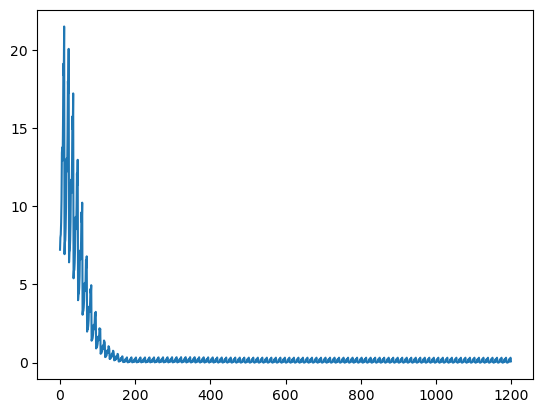

In [ ]:
past_days = 32

class FCAE(nn.Module):
    def __init__(self, input_size=past_days):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )
        self.dec = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_size)
        )

    def forward(self, x):
        enc = self.enc(x)
        return enc, self.dec(enc)

class FeaturesDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

samples = list()
for r in price_history.rolling(past_days):
    sample = r.values[:, 3]
    if len(sample) < past_days:
        continue
    samples.append(np.array(sample).flatten().tolist())
samples = np.array(samples).astype(np.float32)

fcae = FCAE()
optimizer = optim.Adam(
    fcae.parameters(),
    lr=1e-3
)
loss_func = nn.HuberLoss()

datasetf = FeaturesDataset(samples)
dataloaderf = DataLoader(datasetf, batch_size=128, shuffle=False)

losses = list()
for epo in tqdm(range(100)):
    for sample in dataloaderf:
        enc, out = fcae(sample)
        loss = loss_func(out, sample)
        
        fcae.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.detach().item())

print('Last Loss', losses[-1])
plt.plot(losses)
plt.show()

In [ ]:
sample = torch.Tensor(samples[np.random.choice(np.arange(len(samples)), 1)])

In [ ]:
features = list()
for r in price_history.rolling(past_days):
    if len(r) < past_days:
        features.append([np.nan for i in range(8)])
        continue
    with torch.no_grad():
        enc, out = fcae(torch.Tensor([r.values[:, 3]]))
        features.append(enc.squeeze().numpy().tolist())
features = np.array(features)

for i in range(8):
    price_history[i] = features[:, i]
price_history.head(40)

,date,open,high,low,close,volume,symbol,feature_0,feature_1,feature_2,...,feature_6,feature_7,0,1,2,3,4,5,6,7
0,2015-01-05,7.34,7.37,7.28,7.31,273550,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06,7.27,7.36,7.24,7.36,364050,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07,7.36,7.51,7.36,7.40,405560,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08,7.39,7.40,7.31,7.33,227300,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09,7.33,7.42,7.33,7.39,320210,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-12,7.39,7.53,7.39,7.43,679050,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-13,7.40,7.47,7.40,7.45,242060,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-14,7.45,7.48,7.37,7.43,421120,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-15,7.47,7.47,7.40,7.45,281910,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-01-16,7.47,7.47,7.40,7.42,174340,FPT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Technical Indicators using ta library
try:
    import ta
except ImportError:
    print("Installing ta library...")
    !pip install ta
    import ta

print(f"Số dòng ban đầu: {len(price_history)}")

# Tính các chỉ số kỹ thuật trực tiếp trên price_history
# MACD (12, 26, 9)
price_history['macd'] = ta.trend.macd_diff(price_history['close'], window_slow=26, window_fast=12, window_sign=9)

# RSI (14)
price_history['rsi'] = ta.momentum.rsi(price_history['close'], window=14)

# CCI (20)
price_history['cci'] = ta.trend.cci(price_history['high'], price_history['low'], price_history['close'], window=20)

# ADX (14)
price_history['adx'] = ta.trend.adx(price_history['high'], price_history['low'], price_history['close'], window=14)

# Loại bỏ các cột autoencoder features (0-7) nếu có
columns_to_drop = [col for col in price_history.columns if isinstance(col, int)]
if columns_to_drop:
    price_history = price_history.drop(columns=columns_to_drop)
    print(f"Đã xóa {len(columns_to_drop)} cột features: {columns_to_drop}")

# Loại bỏ NaN (các dòng đầu do tính toán chỉ số kỹ thuật)
price_history = price_history.dropna()

print(f"Số dòng sau khi loại NaN: {len(price_history)}")
print(f"Các cột cuối cùng: {list(price_history.columns)}")
print(f"Shape cuối cùng: {price_history.shape}")

# Hiển thị kết quả
price_history.head(100)

Số dòng ban đầu: 1501
Số dòng sau khi loại NaN: 1468
Các cột cuối cùng: ['date', 'open', 'high', 'low', 'close', 'volume', 'symbol', 'macd', 'rsi', 'cci', 'adx']
Shape cuối cùng: (1468, 11)


,date,open,high,low,close,volume,symbol,macd,rsi,cci,adx
33,2015-02-27,7.51,7.54,7.45,7.47,314940,FPT,0.031398,64.308454,138.882929,19.667464
34,2015-03-02,7.50,7.50,7.40,7.42,471270,FPT,0.027010,57.945825,95.558830,20.083270
35,2015-03-03,7.47,7.48,7.43,7.48,214540,FPT,0.026660,62.713300,110.020450,20.469375
36,2015-03-04,7.53,7.73,7.53,7.65,993500,FPT,0.035820,72.296265,203.947368,22.709780
37,2015-03-05,7.73,7.80,7.65,7.65,393540,FPT,0.039529,72.296265,192.634561,25.121627
...,...,...,...,...,...,...,...,...,...,...,...
128,2015-07-16,8.29,8.32,8.21,8.32,611060,FPT,-0.023141,54.213312,-27.300749,37.261311
129,2015-07-17,8.30,8.41,8.29,8.32,315540,FPT,-0.026414,54.213312,-3.633380,36.623390
130,2015-07-20,8.32,8.32,8.23,8.29,419830,FPT,-0.030004,52.035473,-55.171531,35.452863
131,2015-07-21,8.25,8.27,8.14,8.18,876450,FPT,-0.038641,44.911339,-122.875817,33.571799


length 1468


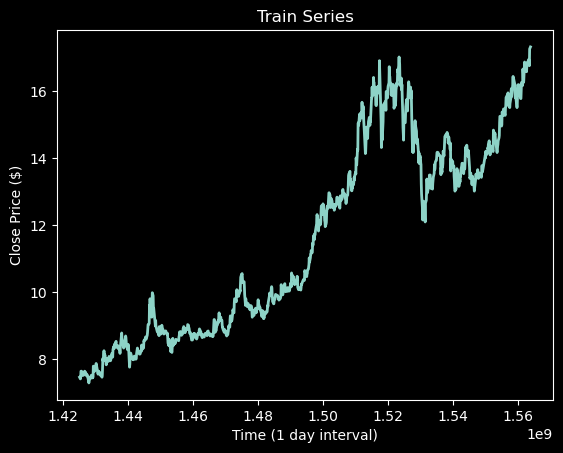

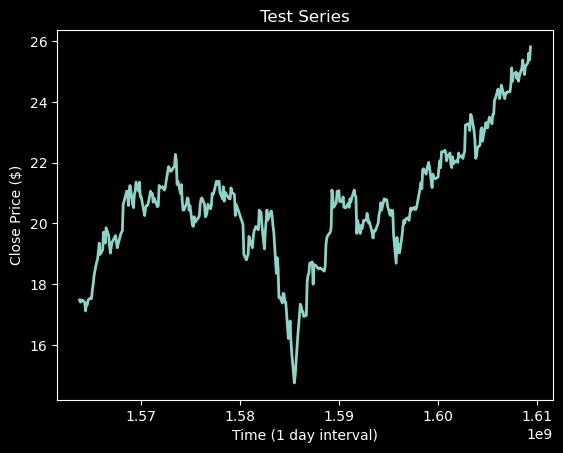

In [108]:
# Import pendulum for timestamp conversion
try:
    import pendulum
except ImportError:
    print("Installing pendulum...")
    !pip install pendulum
    import pendulum

# time_series = list(price_history['close'])
time_series = price_history
print('length', len(time_series))

# Sử dụng cột 'date' thay vì index để tránh lỗi parse
if 'date' in price_history.columns:
    dt_list = [pendulum.parse(str(dt)).float_timestamp for dt in price_history['date']]
else:
    # Nếu không có cột date, tạo index đơn giản
    dt_list = list(range(len(price_history)))

# split into train, val, test
train_portion = 0.75 # 0.8 for 10 years, 0.75 for 8 years
train_ind = int(len(time_series) * train_portion)
# val_ind = train_ind + int(len(time_series) * 0.25)

train_series = time_series[:train_ind]
# val_series = time_series[train_ind:val_ind]
test_series = time_series[train_ind:]

time_int = [
    (0, train_ind), 
#     (train_ind, val_ind), 
    (train_ind, len(time_series))
]
titles = [
    'Train Series', 
#     'Validation Series', 
    'Test Series'
]

# plot
i=0
for series in [train_series, test_series]:
    plt.style.use('dark_background')
    dt_list_c = dt_list[time_int[i][0]:time_int[i][1]]
    plt.plot(dt_list_c, series['close'], linewidth=2)
    plt.title(titles[i])
    plt.xlabel('Time (1 day interval)')
    plt.ylabel('Close Price ($)')
    i += 1
    plt.show()

In [143]:
# Risk/Investment Management
balance_init = 1000 # initial balance in hand
k = 5 # max number of shares
min_balance = -100 # tolerance balance

# action
A = [a for a in range(-k, k+1, 1)]

# transition
def get_features(s, new_record):
    """
    Extract technical indicator features from a record
    Returns: [macd, rsi, cci, adx]
    """
    # Columns: date(0), open(1), high(2), low(3), close(4), volume(5), symbol(6), macd(7), rsi(8), cci(9), adx(10)
    return [
        float(new_record['macd']),
        float(new_record['rsi']),
        float(new_record['cci']),
        float(new_record['adx'])
    ]

def update_state(s, a, new_record):
    # s: (price, balance, shares)
    price, balance, shares = s[0], s[1], s[2]
    # a: (0 is hold, -k is sell, +k is buying)
    
    # Constraints
    # if is sell, check if there are enough number of shares
    if a < 0:
        if shares <= abs(a):
            a = -shares
    elif a > 0: # if buying, check if there are enough balance
        if balance - (a * price) < min_balance:
            possible_balance = np.array([balance - (a_ * price) for a_ in range(a)]) >= min_balance
            a = np.argmax(possible_balance)
    new_shares = shares + a
    new_balance = balance - (a * price)
    
    # apply fee (approx 0.1%)
    new_balance -= (a * price) * 1e-3
    
    # update state: [price, balance, shares, macd, rsi, cci, adx]
    features = get_features(s, new_record)
    return [float(new_record['close']), float(new_balance), float(new_shares)] + features

# reward
def reward(s, s_next):
    return (s[1] + s[0]*s[2]) - (s_next[1] + s_next[0]*s_next[2])

# interact
def simulate(series, state_init, pi, greedy, eps=0.2):
    Rs = list()
    actions = list()
    states = [state_init]
    for index, row in series.iterrows():
        a = pi(states[-1], greedy=greedy, eps=eps)
        actions.append(a)
        states.append(update_state(states[-1], a, row))
        Rs.append(reward(states[-2], states[-1]))
    return states, Rs, actions

def interact_test(pi, series_name='test', verbose=True):
    if series_name == 'test':
        series = test_series
        prev_series = train_series
        prev_ind = -1
    elif series_name == 'train':
        series = train_series[1:]
        prev_series = train_series
        prev_ind = 0

    # Initialize state: [price, balance, shares, macd, rsi, cci, adx]
    prev_row = prev_series.iloc[prev_ind]
    state_init = [
        float(prev_row['close']), 
        balance_init, 
        0,
        float(prev_row['macd']),
        float(prev_row['rsi']),
        float(prev_row['cci']),
        float(prev_row['adx'])
    ]

    # start a trajectory
    states, rewards, actions = simulate(series, state_init, pi, True)

    # verbose
    portforlio = np.array([s[1] + s[0]*s[2] for s in states])
    if verbose:
        print("Profit at The End of Trajactory:", portforlio[-1] - balance_init)

        plt.style.use('dark_background')
        plt.plot(series['close'])
        plt.title("Price")
        plt.xlabel("Time (1 day inter val)")
        plt.ylabel("Price ($)")
        plt.show()

        plt.style.use('dark_background')
        plt.plot([s[2] for s in states])
        plt.title("Number of Shares")
        plt.xlabel("Time (1 day interval)")
        plt.ylabel("Num shares")
        plt.show()

        plt.style.use('dark_background')
        plt.plot(portforlio)
        plt.title("Portfolio ($)")
        plt.xlabel("Time (1 day inter val)")
        plt.ylabel("Portfolio ($)")
        plt.show()

        plt.style.use('dark_background')
        plt.plot(portforlio - balance_init)
        plt.title("Trading Profit")
        plt.xlabel("Time (1 day interval)")
        plt.ylabel("Profit ($)")
        plt.show()
    
    return portforlio[-1] - balance_init

In [144]:
# policy
def pi_random(s, greedy=False, eps=0.2):
    return np.random.choice(A) # random policy (uniform distributed)

profits = list()
for rep in tqdm(range(20)):
    profits.append(interact_test(pi_random, series_name='test', verbose=False))
print("Avg Profit", np.mean(profits))
print('STD Profit', np.std(profits))

100%|██████████| 20/20 [00:01<00:00, 13.25it/s]

Avg Profit 153.97884249999998
STD Profit 86.68214616123201


Profit at The End of Trajactory: 1420.0597500000003


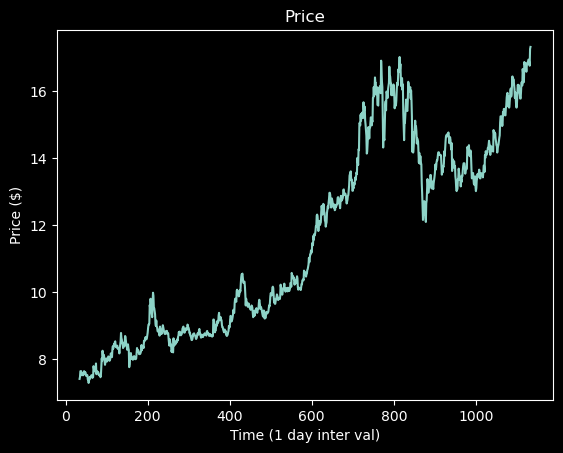

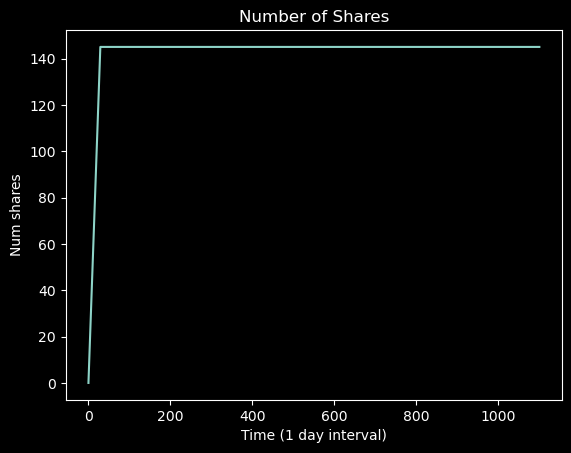

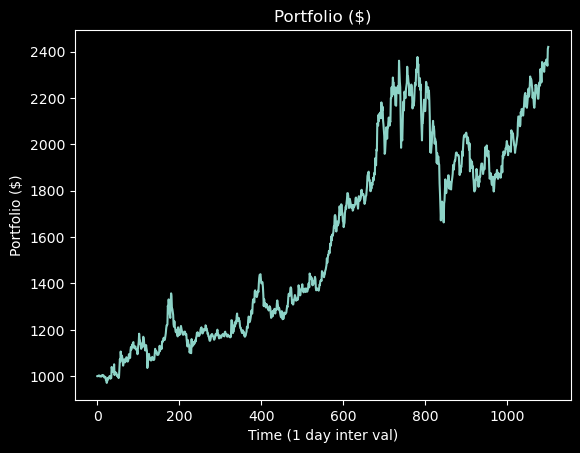

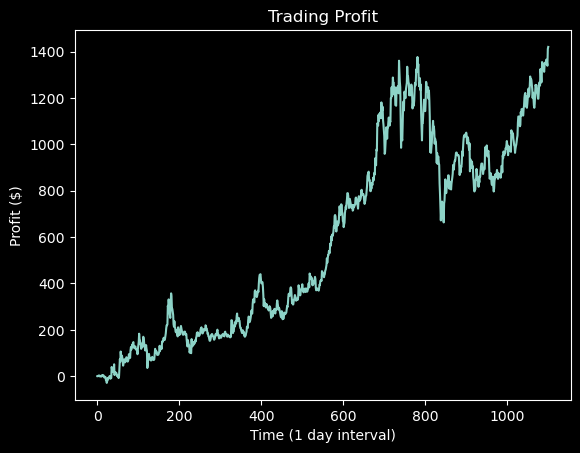

Profit at The End of Trajactory: 503.2056500000001


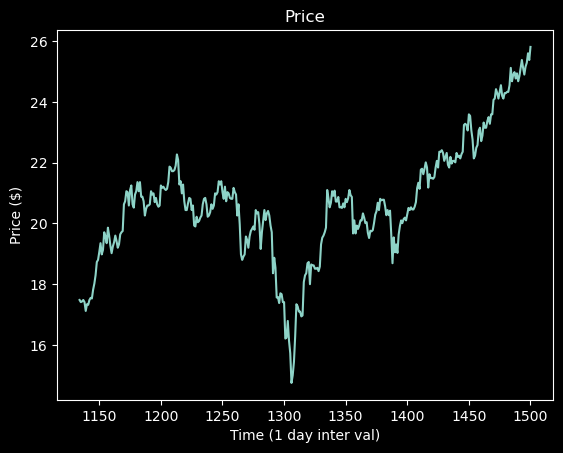

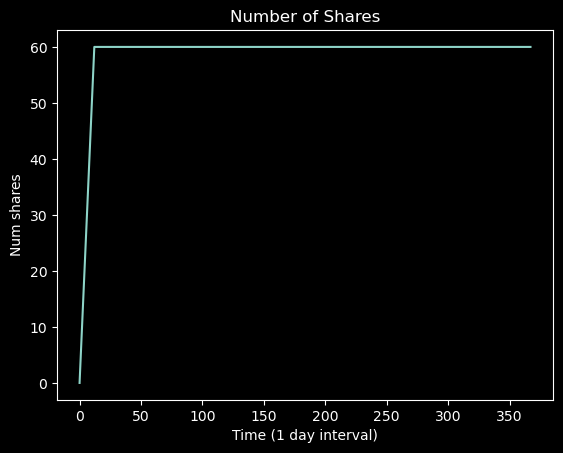

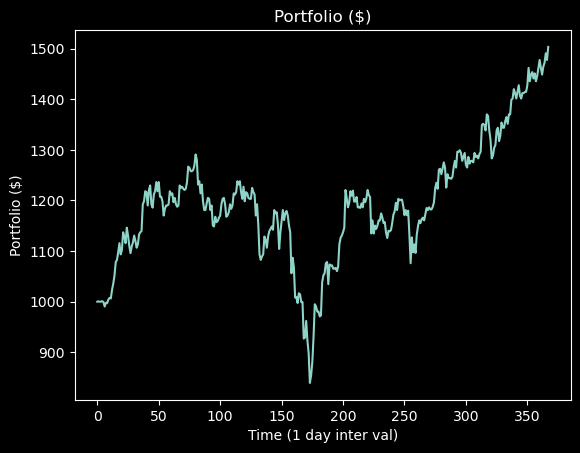

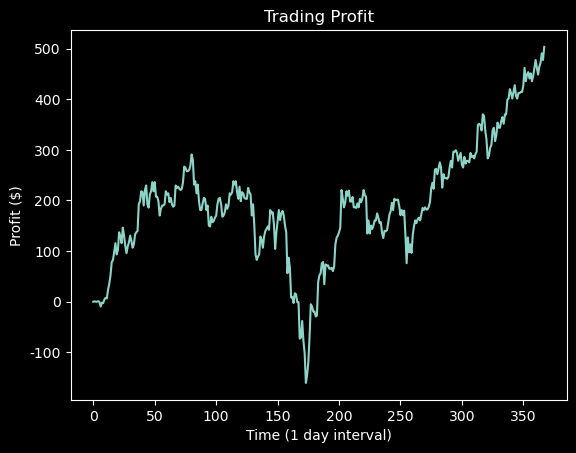

In [145]:
# policy
def pi_hold(s, greedy=False, eps=0.2):
    return A[-1] # Buy at very beginning, hold till the end
final_profit = interact_test(pi_hold, series_name='train', verbose=True)
final_profit = interact_test(pi_hold, series_name='test', verbose=True)

In [149]:
class Qsa(nn.Module):
    def __init__(self, input_size=7, num_classes=len(A)):
        super().__init__()
        self.fc_liner = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
#             nn.Linear(32, 16),
#             nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.fc_liner(x)

class StatesDataset(Dataset):
    def __init__(self, states, rewards, actions):
        self.states = torch.Tensor(states[:-1]).float()
        self.states_next = torch.Tensor(states[1:]).float()
        self.rewards = torch.Tensor(rewards).float()
        self.actions = actions

    def __len__(self):
        return len(self.states)

    def __getitem__(self, idx):
        return {
            'states': self.states[idx],
            'states_next': self.states_next[idx],
            'rewards': self.rewards[idx],
            'actions': self.actions[idx]
        }

def deep_sarsa(qsa, 
               series, 
               state_init, 
               pi, 
               optimizer,
               loss_func,
               epochs=10,
               episode=100, 
               gamma=0.9,
               lr=0.7,
               eps=0.5,
               min_eps=0.05,
               decay=0.9,
               greedy=False,
               verbose=True
              ):
    """
    Deep SARSA: On-policy TD control algorithm
    Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
    where a' is the actual action chosen by the policy at state s'
    """
    losses = list()
    learning_curve = list()
    
    # Loop for each episode
    for epi in tqdm(range(episode), desc="Training Deep SARSA"):
        # Decay epsilon for exploration
        eps *= decay
        
        # Generate a trajectory using current policy
        states, rewards, actions = simulate(series, state_init, pi, greedy, eps=max(min_eps, eps))
        
        # Form dataset and data loader
        dataset = StatesDataset(states, rewards, actions)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=False)
        
        # Train the neural network
        for epo in range(epochs):
            for data_pack in dataloader:
                # Current Q(s,a)
                input_tensor = data_pack['states']
                out = qsa(input_tensor)
                
                # Convert actions to list if it's a tensor
                actions_list = data_pack['actions'].tolist() if torch.is_tensor(data_pack['actions']) else list(data_pack['actions'])
                current_q = out[[i for i in range(len(data_pack['rewards']))], 
                               [a+k for a in actions_list]]

                # Target: r + γQ(s',a') where a' is next action actually taken
                with torch.no_grad():
                    next_q_values = qsa(data_pack['states_next'])
                    
                    # SARSA: Use Q-value of the next action actually taken
                    # For the last state, use the last action as there's no next action
                    actions_list = data_pack['actions'].tolist() if torch.is_tensor(data_pack['actions']) else list(data_pack['actions'])
                    next_actions = actions_list[1:] + [actions_list[-1]]
                    next_action_indices = [a+k for a in next_actions]
                    
                    next_q = next_q_values[[i for i in range(len(next_action_indices))], 
                                          next_action_indices]
                    
                    # SARSA update target
                    target_q = data_pack['rewards'] + gamma * next_q
                    
                # Smooth update: mix old Q with new target
                target_tensor = (1 - lr) * current_q + lr * target_q

                # Compute loss and update weights
                loss = loss_func(current_q, target_tensor)
                qsa.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.detach().item())
        
        # Evaluate on test set after each episode
        learning_curve.append(interact_test(pi, series_name='test', verbose=False))
    
    # Plot training results
    if verbose:
        print(f"Final loss: {losses[-1]:.6f}")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss curve
        ax1.plot(losses, linewidth=1, alpha=0.7)
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('Deep SARSA Training Loss')
        ax1.grid(alpha=0.3)
        
        # Plot learning curve
        ax2.plot(learning_curve, linewidth=2, marker='o', markersize=4)
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Profit ($)')
        ax2.set_title('Deep SARSA Learning Curve (Test Set)')
        ax2.grid(alpha=0.3)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig('deep_sarsa_training.pdf')
        plt.show()
        
    return learning_curve

In [150]:

def train_deep_sarsa(verbose=False):
    """
    Train a Deep SARSA agent for stock trading
    
    Returns:
        pi_deep: Trained policy function
        qsa: Trained Q-network
        learning_curve: Profit on test set per episode
    """
    # Initialize Q-network
    qsa = Qsa(input_size=7, num_classes=len(A))
    
    # Initial state from first training sample
    first_row = train_series.iloc[0]
    # State: [price, balance, shares, macd, rsi, cci, adx]
    # Columns: date(0), open(1), high(2), low(3), close(4), volume(5), symbol(6), macd(7), rsi(8), cci(9), adx(10)
    state_init = [
        float(first_row['close']), 
        balance_init, 
        0,
        float(first_row['macd']),
        float(first_row['rsi']),
        float(first_row['cci']),
        float(first_row['adx'])
    ]
    series = train_series[1:].reset_index(drop=True)

    # Optimizer
    optimizer = optim.Adam(
        qsa.parameters(),
        lr=1e-5  # Learning rate for neural network
    )
    
    # Loss function
    loss_func = nn.HuberLoss()

    # Define epsilon-greedy policy based on Q-network
    def pi_deep(s, eps=0.2, greedy=False):
        """
        Policy that selects actions based on Q-values
        
        Args:
            s: Current state
            eps: Exploration rate
            greedy: If True, always select best action
        """
        with torch.no_grad():
            out_qsa = qsa(torch.Tensor(s).float()).squeeze()
            action = out_qsa.argmax().item() - k  # Best action

            if not greedy:
                r = np.random.rand()
                # Epsilon-greedy exploration
                if r < eps:
                    action = np.random.choice(A)
        return action

    # Train using Deep SARSA algorithm
    print("="*80)
    print("TRAINING DEEP SARSA AGENT")
    print("="*80)
    print(f"Network: {qsa}")
    print(f"\nHyperparameters:")
    print(f"  • Episodes: 30")
    print(f"  • Epochs per episode: 10")
    print(f"  • Discount factor (γ): 0.6")
    print(f"  • Learning rate (α): 0.7")
    print(f"  • Initial ε: 0.8")
    print(f"  • Min ε: 0.2")
    print(f"  • ε decay: 0.9")
    print("-"*80)
    
    learning_curve = deep_sarsa(
        qsa,
        series,
        state_init,
        pi_deep,
        optimizer,
        loss_func,
        epochs=10,      # Number of epochs for training NN in each episode
        episode=30,     # Number of episodes
        gamma=0.6,      # Discount coefficient
        lr=0.7,         # Learning rate for Q-function update
        eps=0.8,        # Initial epsilon for ε-greedy policy
        min_eps=0.2,    # Minimum epsilon
        decay=0.9,      # Epsilon decay rate
        greedy=False,
        verbose=verbose
    )
    
    print("\n" + "="*80)
    print("TRAINING COMPLETED!")
    print("="*80)
    
    return pi_deep, qsa, learning_curve


🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 
DEEP SARSA FOR STOCK TRADING
🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 

TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training Deep SARSA: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]



Final loss: 10.278845


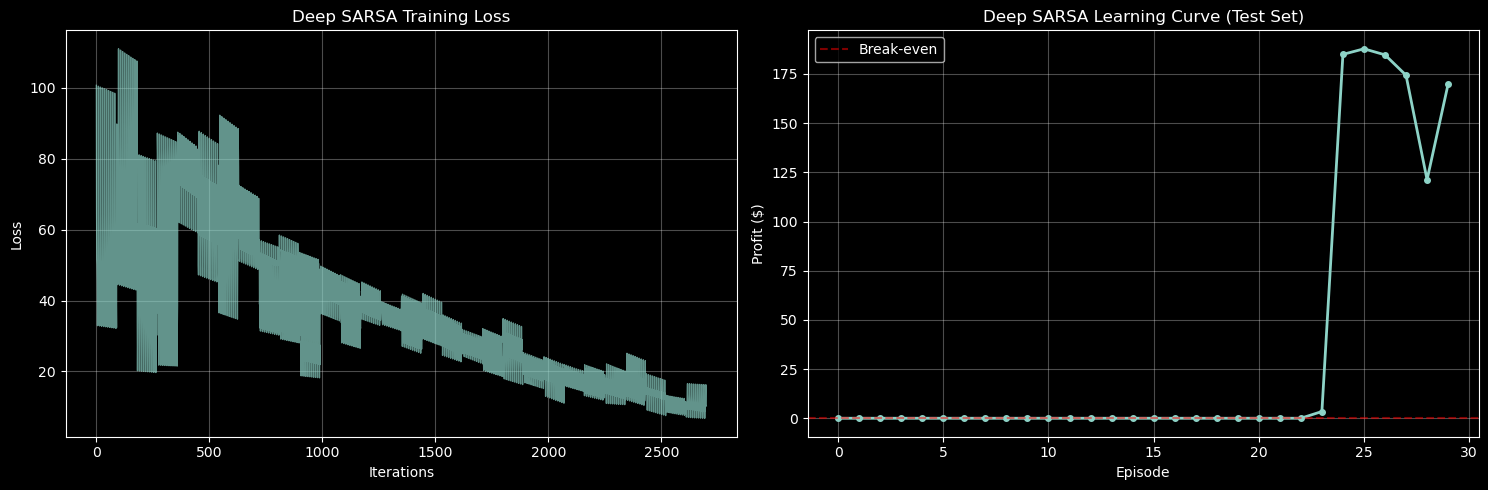


TRAINING COMPLETED!

FINAL EVALUATION ON TEST SET
Profit at The End of Trajactory: 169.78962000000047


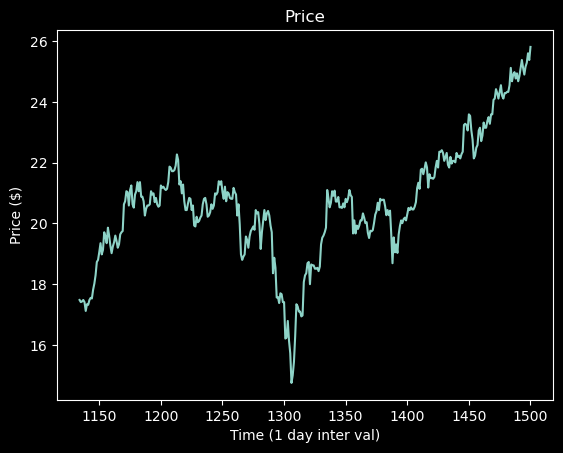

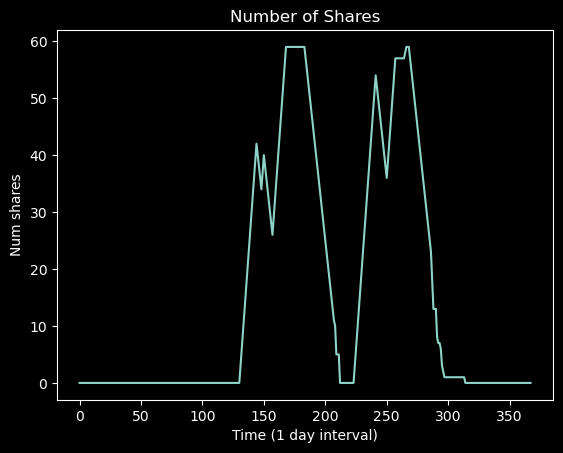

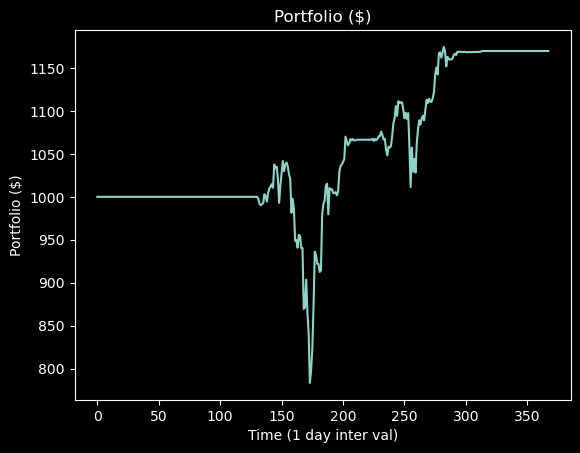

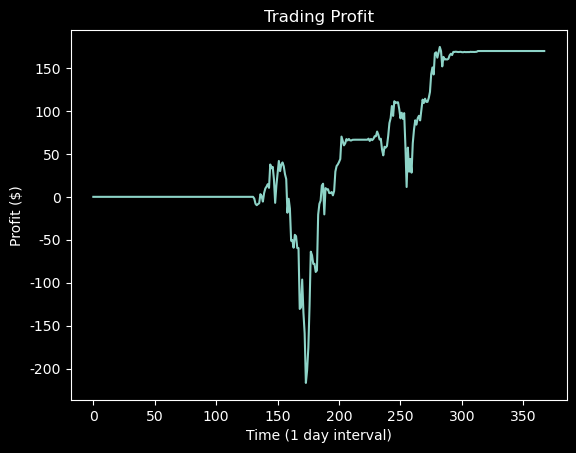


💰 Final Profit: $169.79
📊 Return on Investment: 16.98%

TRAINING SUMMARY

📈 Learning Curve Statistics:
  • Best profit during training:  $187.81
  • Worst profit during training: $0.00
  • Average profit:               $34.21
  • Std deviation:                $68.91
  • Final test profit:            $169.79

✅ DEEP SARSA TRAINING AND EVALUATION COMPLETED!


In [151]:
# ============================================================
# TRAIN DEEP SARSA AGENT
# ============================================================
print("\n" + "🚀 "*20)
print("DEEP SARSA FOR STOCK TRADING")
print("🚀 "*20 + "\n")

# Train the agent
pi_deep, qsa, learning_curve = train_deep_sarsa(verbose=True)

# ============================================================
# EVALUATE ON TEST SET
# ============================================================
print("\n" + "="*80)
print("FINAL EVALUATION ON TEST SET")
print("="*80)

final_profit = interact_test(pi_deep, series_name='test', verbose=True)

print(f"\n💰 Final Profit: ${final_profit:.2f}")
print(f"📊 Return on Investment: {(final_profit/balance_init)*100:.2f}%")

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*80)
print("TRAINING SUMMARY")
print("="*80)
print(f"\n📈 Learning Curve Statistics:")
print(f"  • Best profit during training:  ${max(learning_curve):.2f}")
print(f"  • Worst profit during training: ${min(learning_curve):.2f}")
print(f"  • Average profit:               ${np.mean(learning_curve):.2f}")
print(f"  • Std deviation:                ${np.std(learning_curve):.2f}")
print(f"  • Final test profit:            ${final_profit:.2f}")

print("\n✅ DEEP SARSA TRAINING AND EVALUATION COMPLETED!")